### 1. Programe la regla 110 sobre un autómata celular unidimensional de longitud L y una evolución de T unidades de tiempo.

In [22]:
# importamos las librerías necesarias

import numpy as np
import matplotlib.pyplot as plt

""" Conjunto de funciones para calcular la regla 110 sobre un autómata celular unidimensional de longitud L y una evolución de
T unidades de tiempo.  """


def generate_rule_110(steps, width, rule_number):
    # Convierto mi rule_number en una cadena de 8 dígitos
    rule = format(rule_number, '08b')
    #Crear una fila inicial aleatoria de células
    current_row = np.random.choice((1, 0), width) 
    # Inicializa una lista para almacenar todas las filas
    rows = [current_row]
    for _ in range(steps - 1):
        # Paso 4: Crear una nueva fila llena de ceros
        new_row = np.zeros(width, dtype=int)

        # Paso 5: Iterar a través de las células en la fila actual
        for i in range(1, width - 1):
            # creo una cadena de 3 celulas vecinas 
            neighborhood = ''.join(map(str, current_row[i - 1:i + 2]))
            # hago conversión a decimal y le "resto" 7
            conver=7 - int(neighborhood, 2)
            new_row[i] = rule[conver]
        
        # Paso 8: Actualizar la fila actual para la próxima iteración
        current_row = new_row

        # Paso 9: Agregar la nueva fila a la lista de filas
        rows.append(current_row)

    # Paso 10: Devolver todas las filas como una matriz NumPy
    return np.array(rows)


def plot_rule_110(rule_number, steps, width):
    rows = generate_rule_110(steps, width, rule_number)
    plt.imshow(rows, cmap='binary', interpolation='none')
    plt.title(f"Regla {rule_number} con Longitud {width} y con {steps} unidades de tiempo",fontsize=20,pad=20)

def comparacion(regla):
    plt.figure(figsize=(25,20))
    plt.suptitle(f"Comparación de la Regla {regla} en Potencias de 10",fontsize=20)
    plt.subplot(2,2,1)
    plot_rule_110(regla,10,10)
    plt.subplot(2,2,2)
    plot_rule_110(regla,100,100)
    plt.subplot(2,1,2)
    plot_rule_110(regla,1000,1000)
    plt.subplots_adjust(top=0.9)  
    plt.show()
 

### 2. Evolucione el autómata celular para diferentes valores de $ L = 10, 100, 1000, 10^4, 10^5,10^6 celdas $ y $ 𝑇 = 10, 100, 1000, 10^4, 10^5, 10^6 $… pasos discretos.

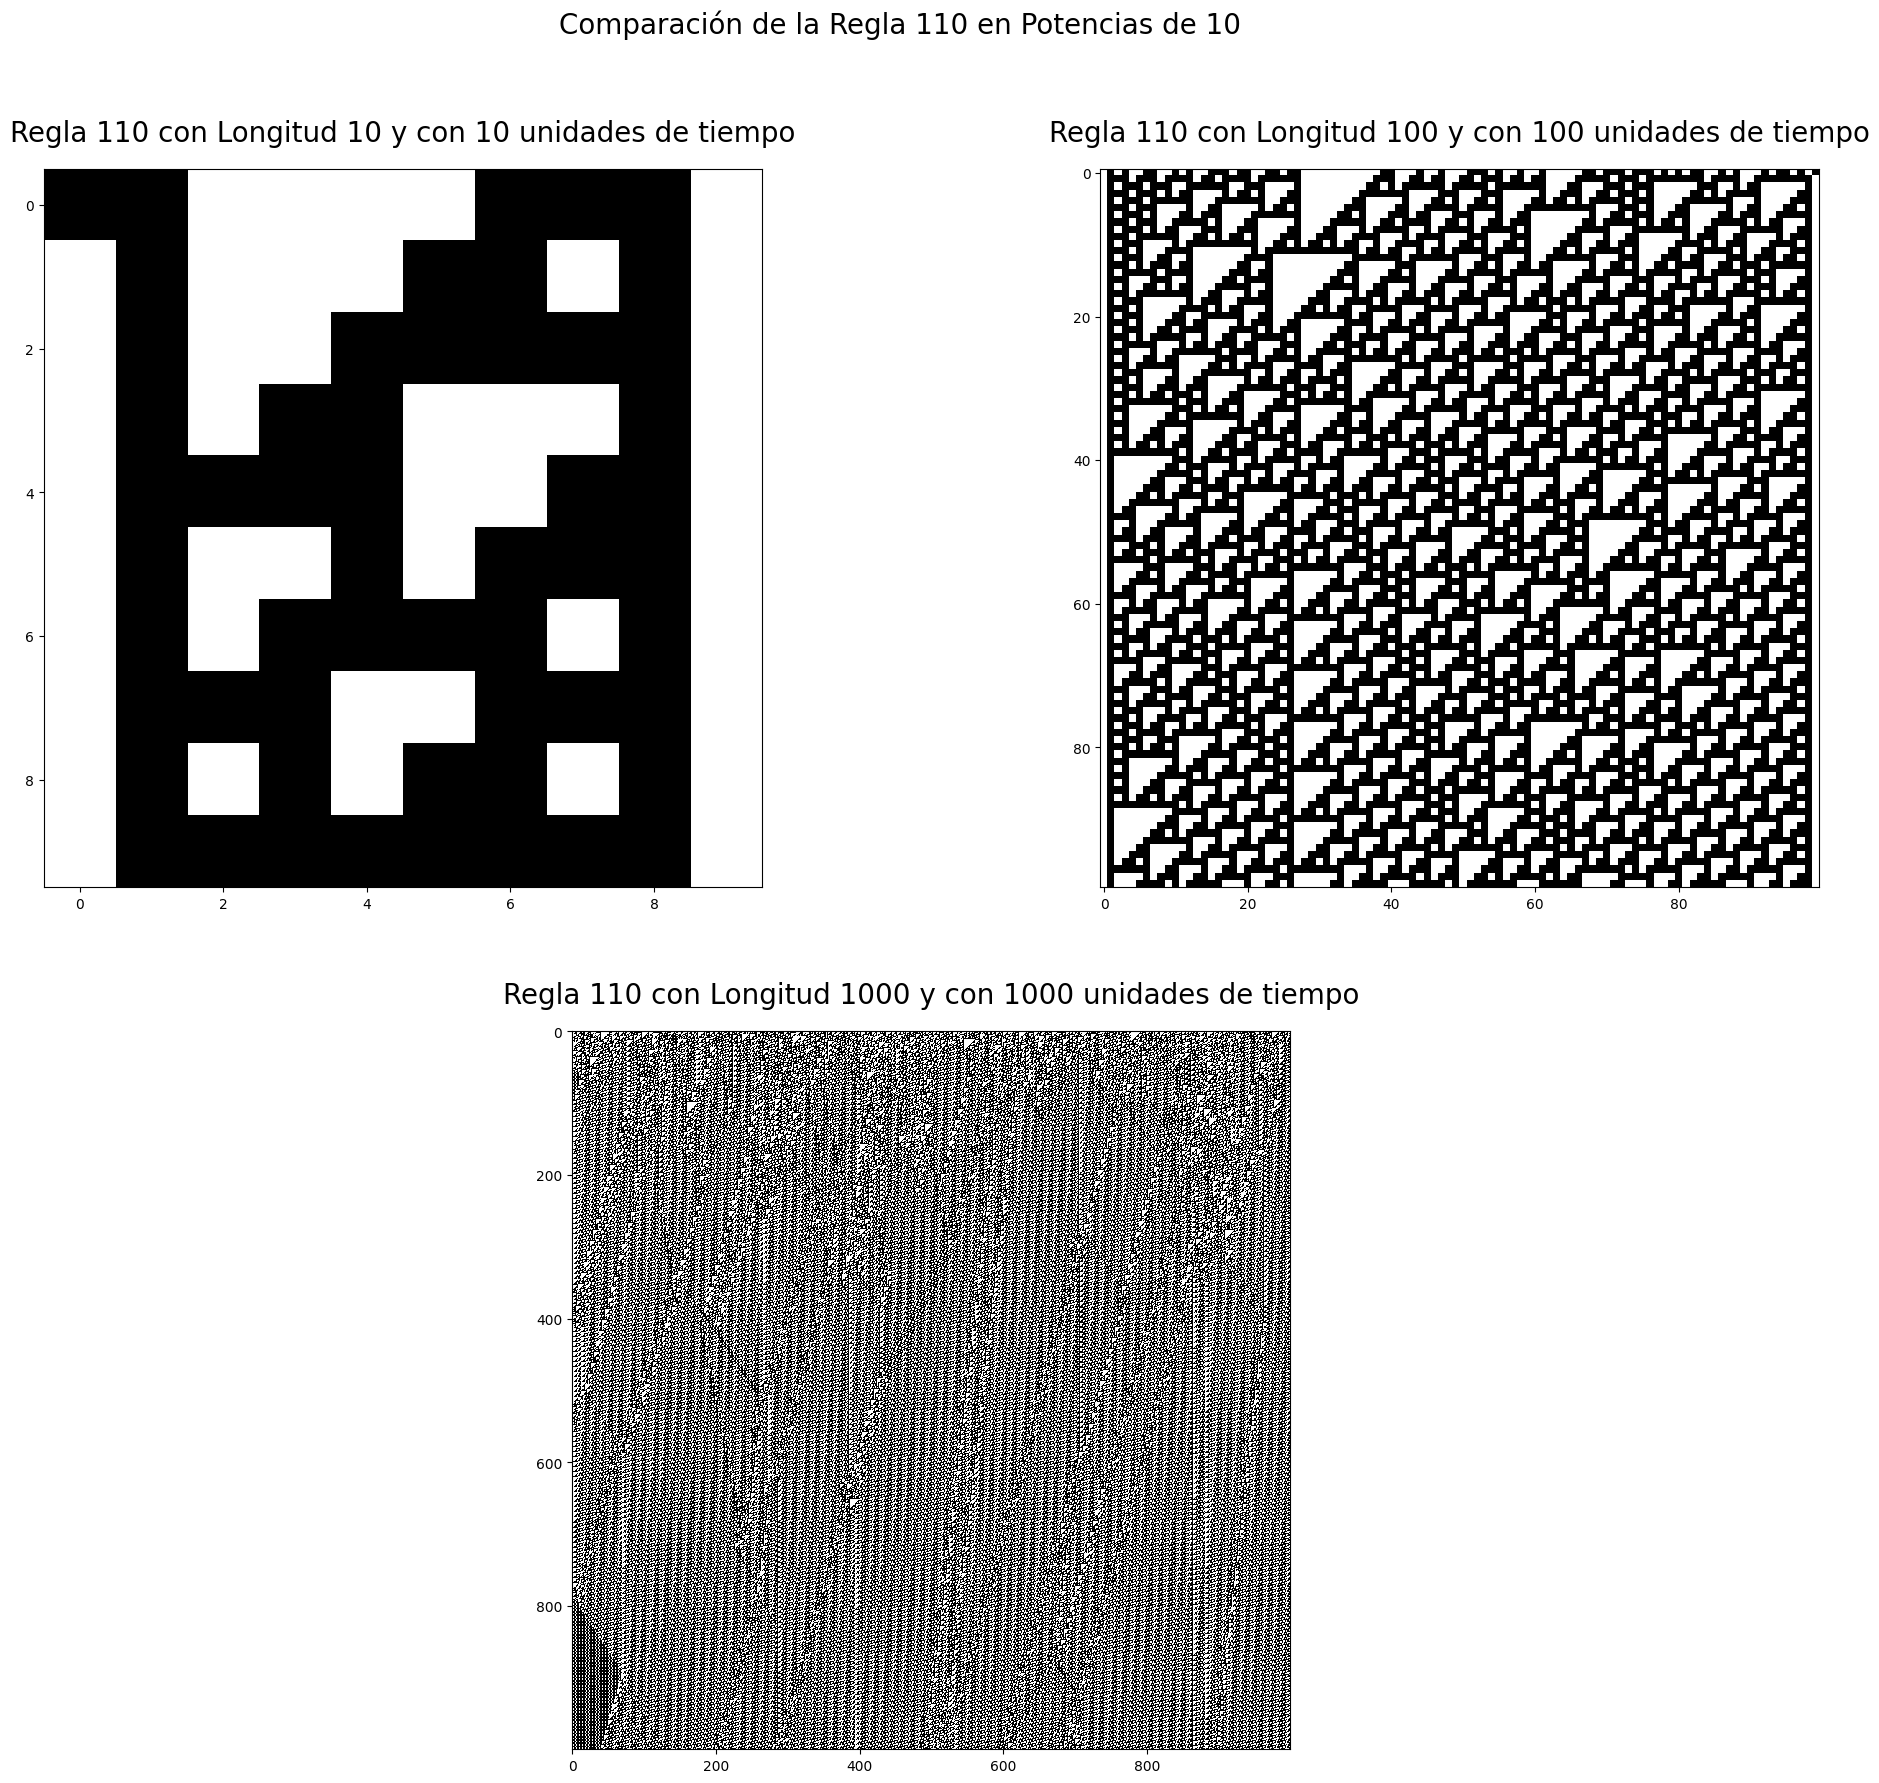

In [23]:
comparacion(110)


### 3. Identifique patrones espacio-temporales en los estados que de celdas. Estos patrones corresponden a un autómata de etiquetas cíclico, mediante el cual se pueden codificar los datos, estados y reglas de producción de una Máquina de Turing

### 4. Adapte su programa para que utilice diferentes reglas codificadas en números de 8 bits ($2^8 =256$): 𝑦 = $𝑏_7𝑏_6𝑏_5𝑏_4𝑏_3𝑏_2𝑏_1𝑏_0$ y pruebe su implementación para 10 reglas distintas (entre 0 a255)

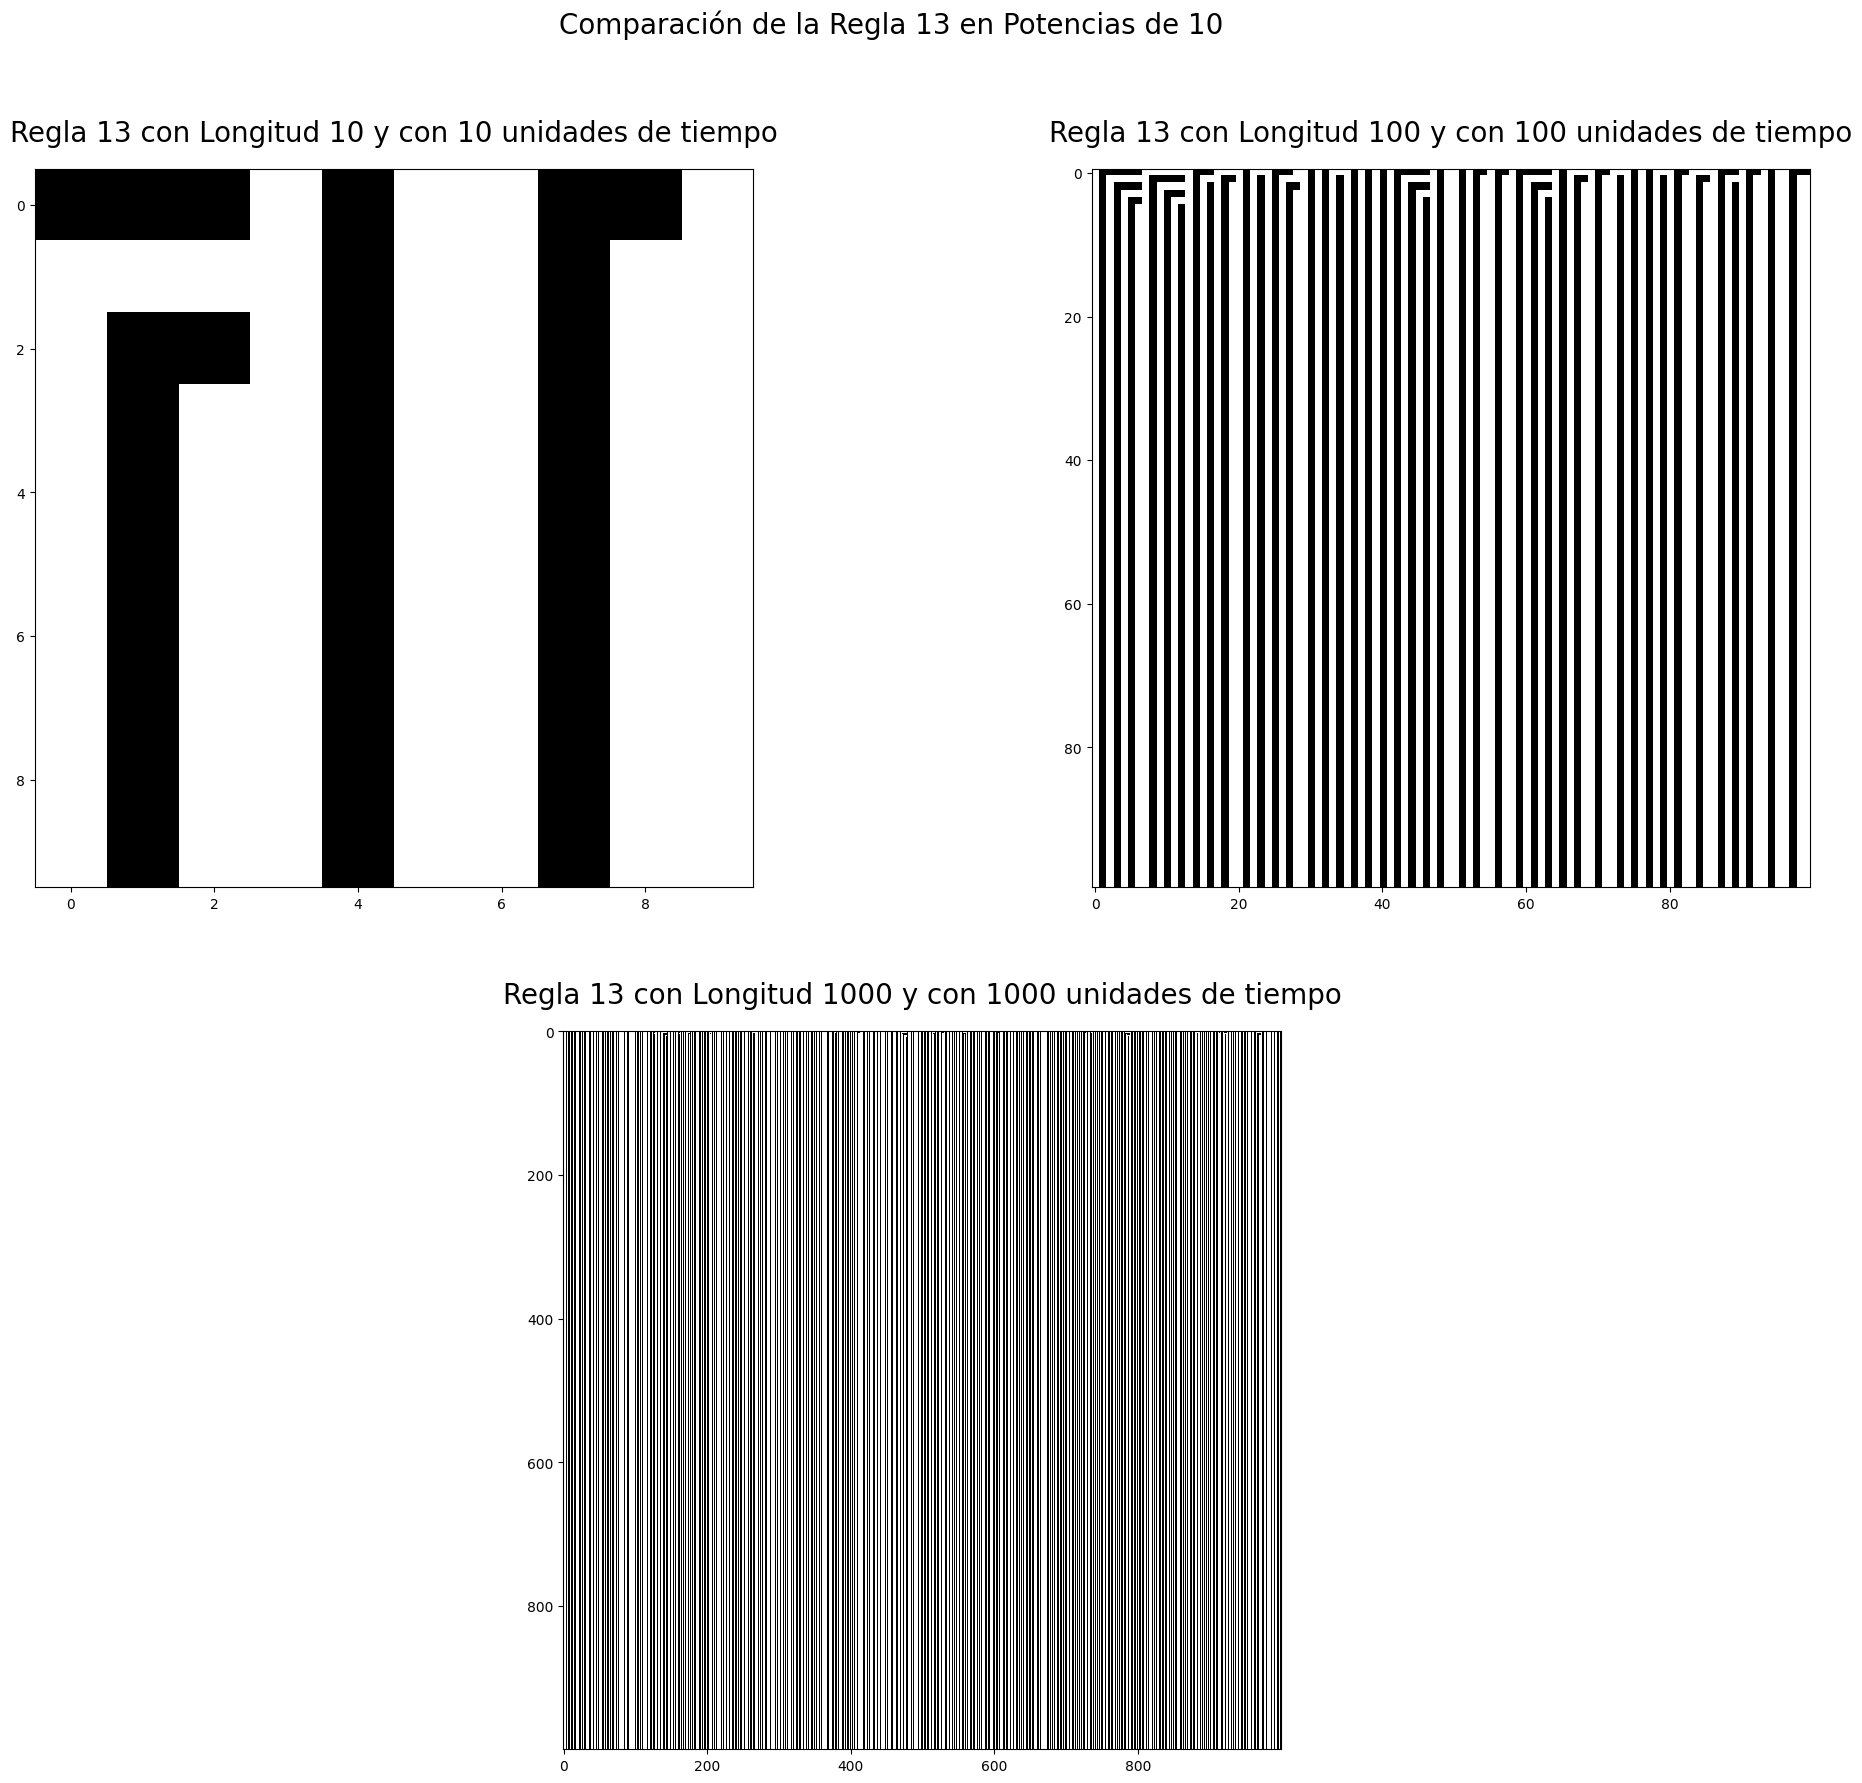

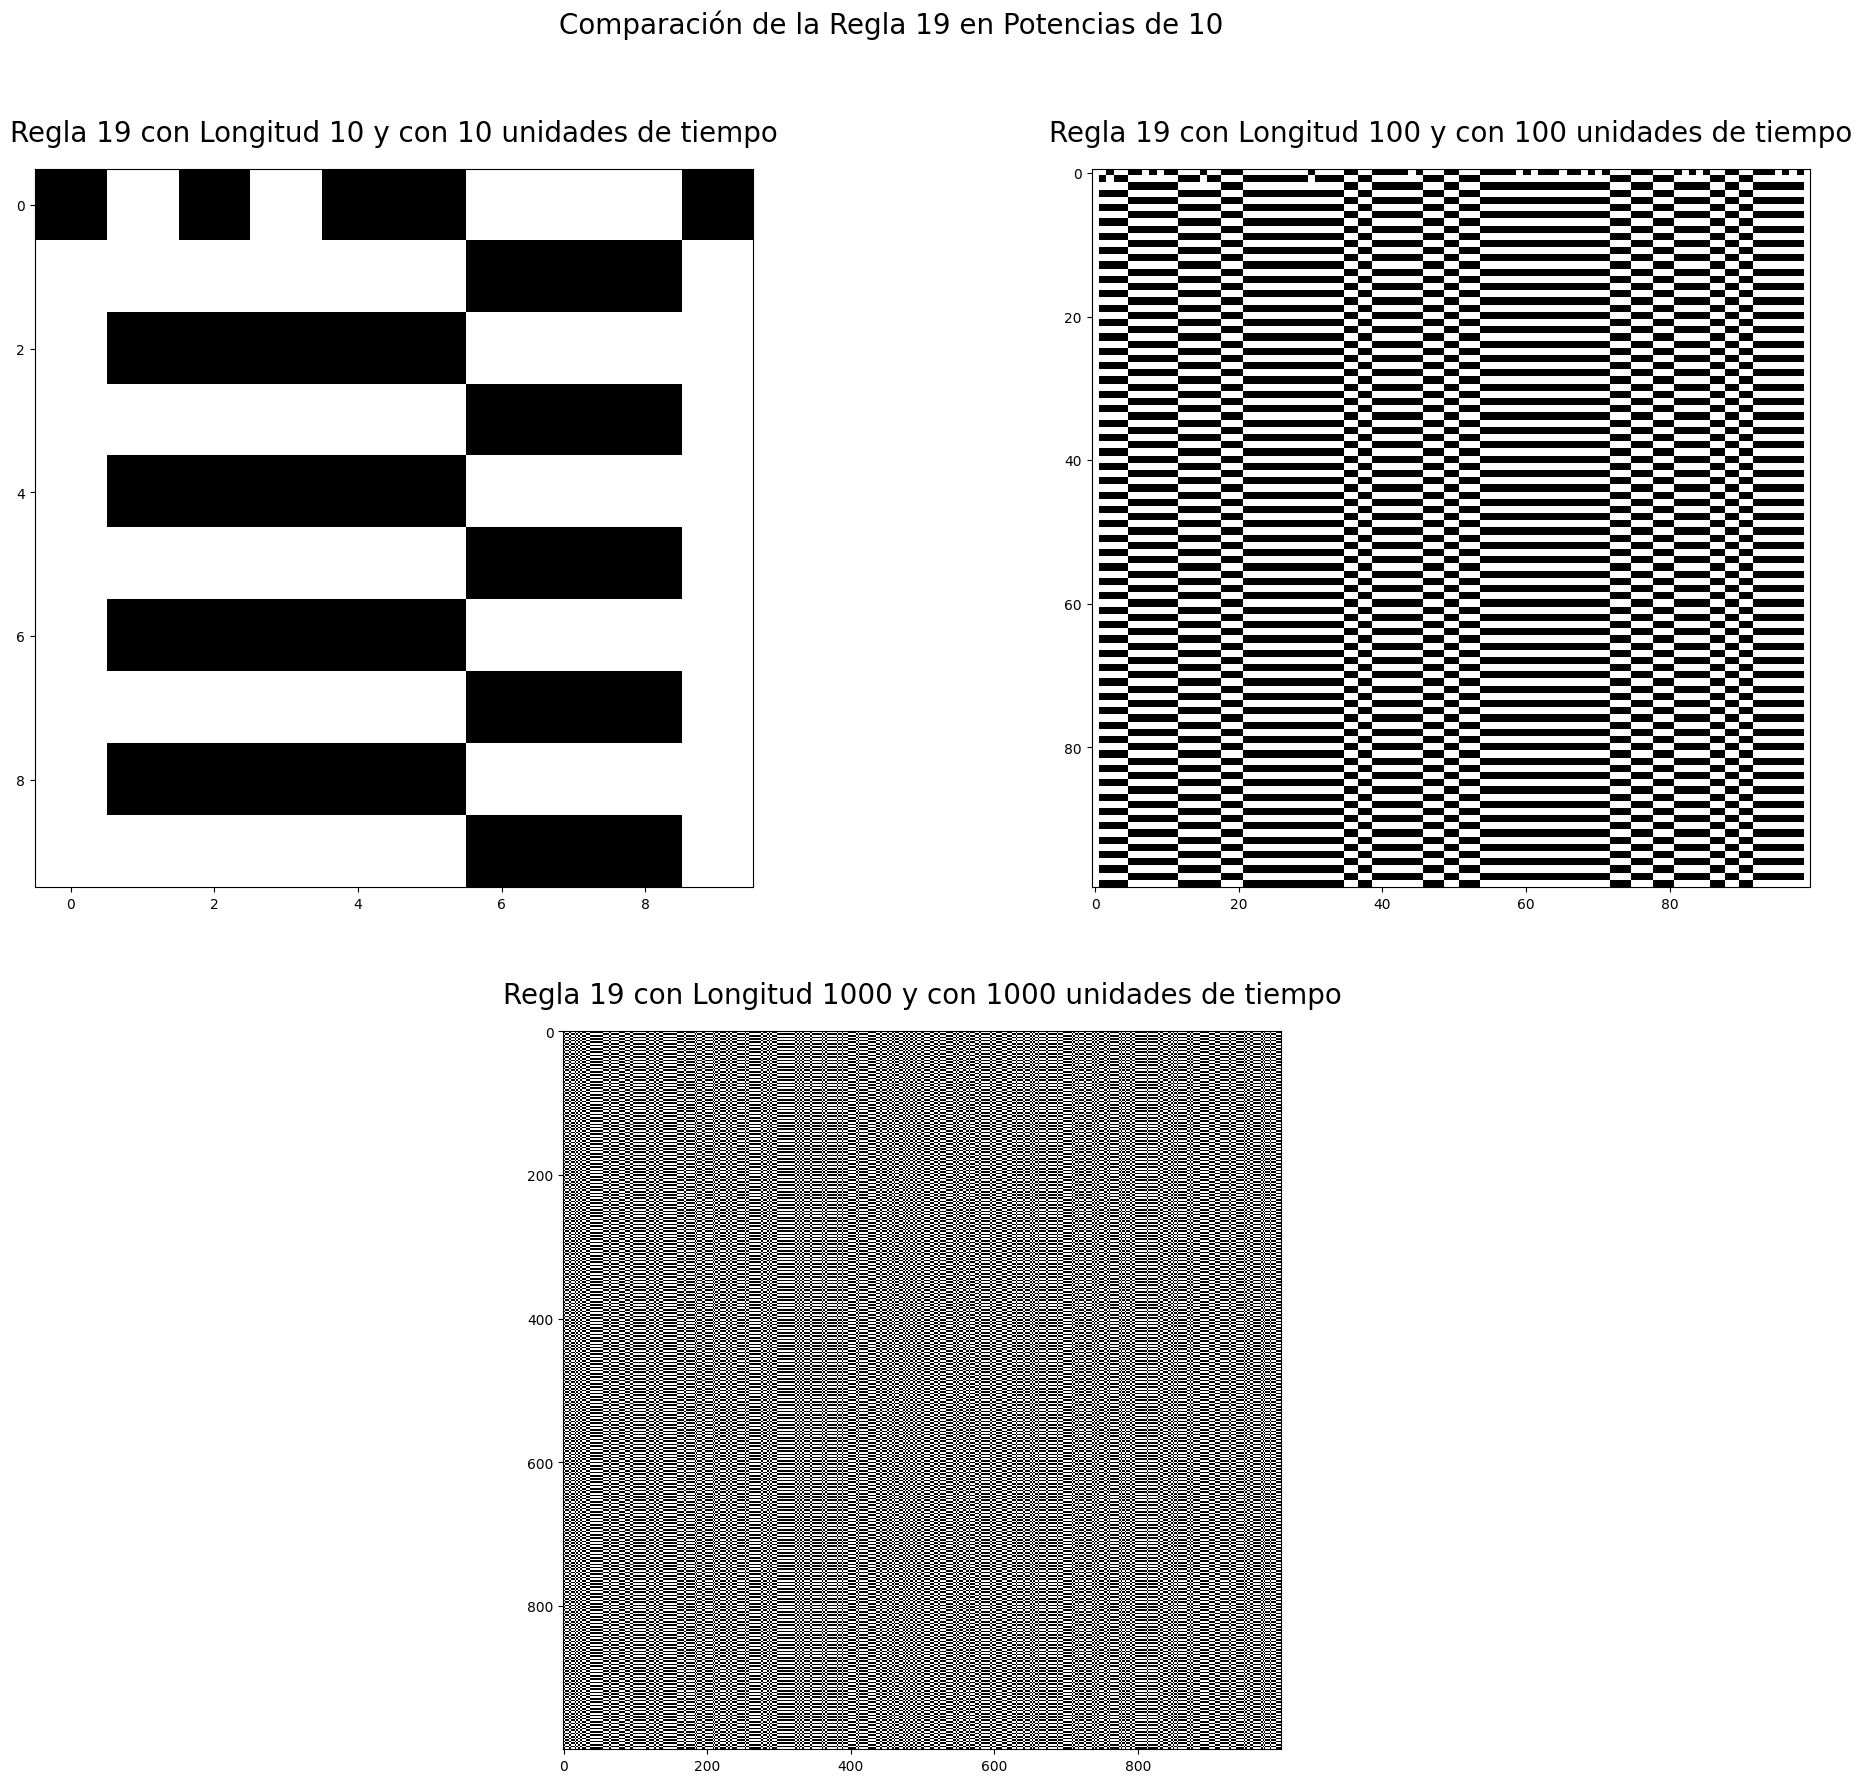

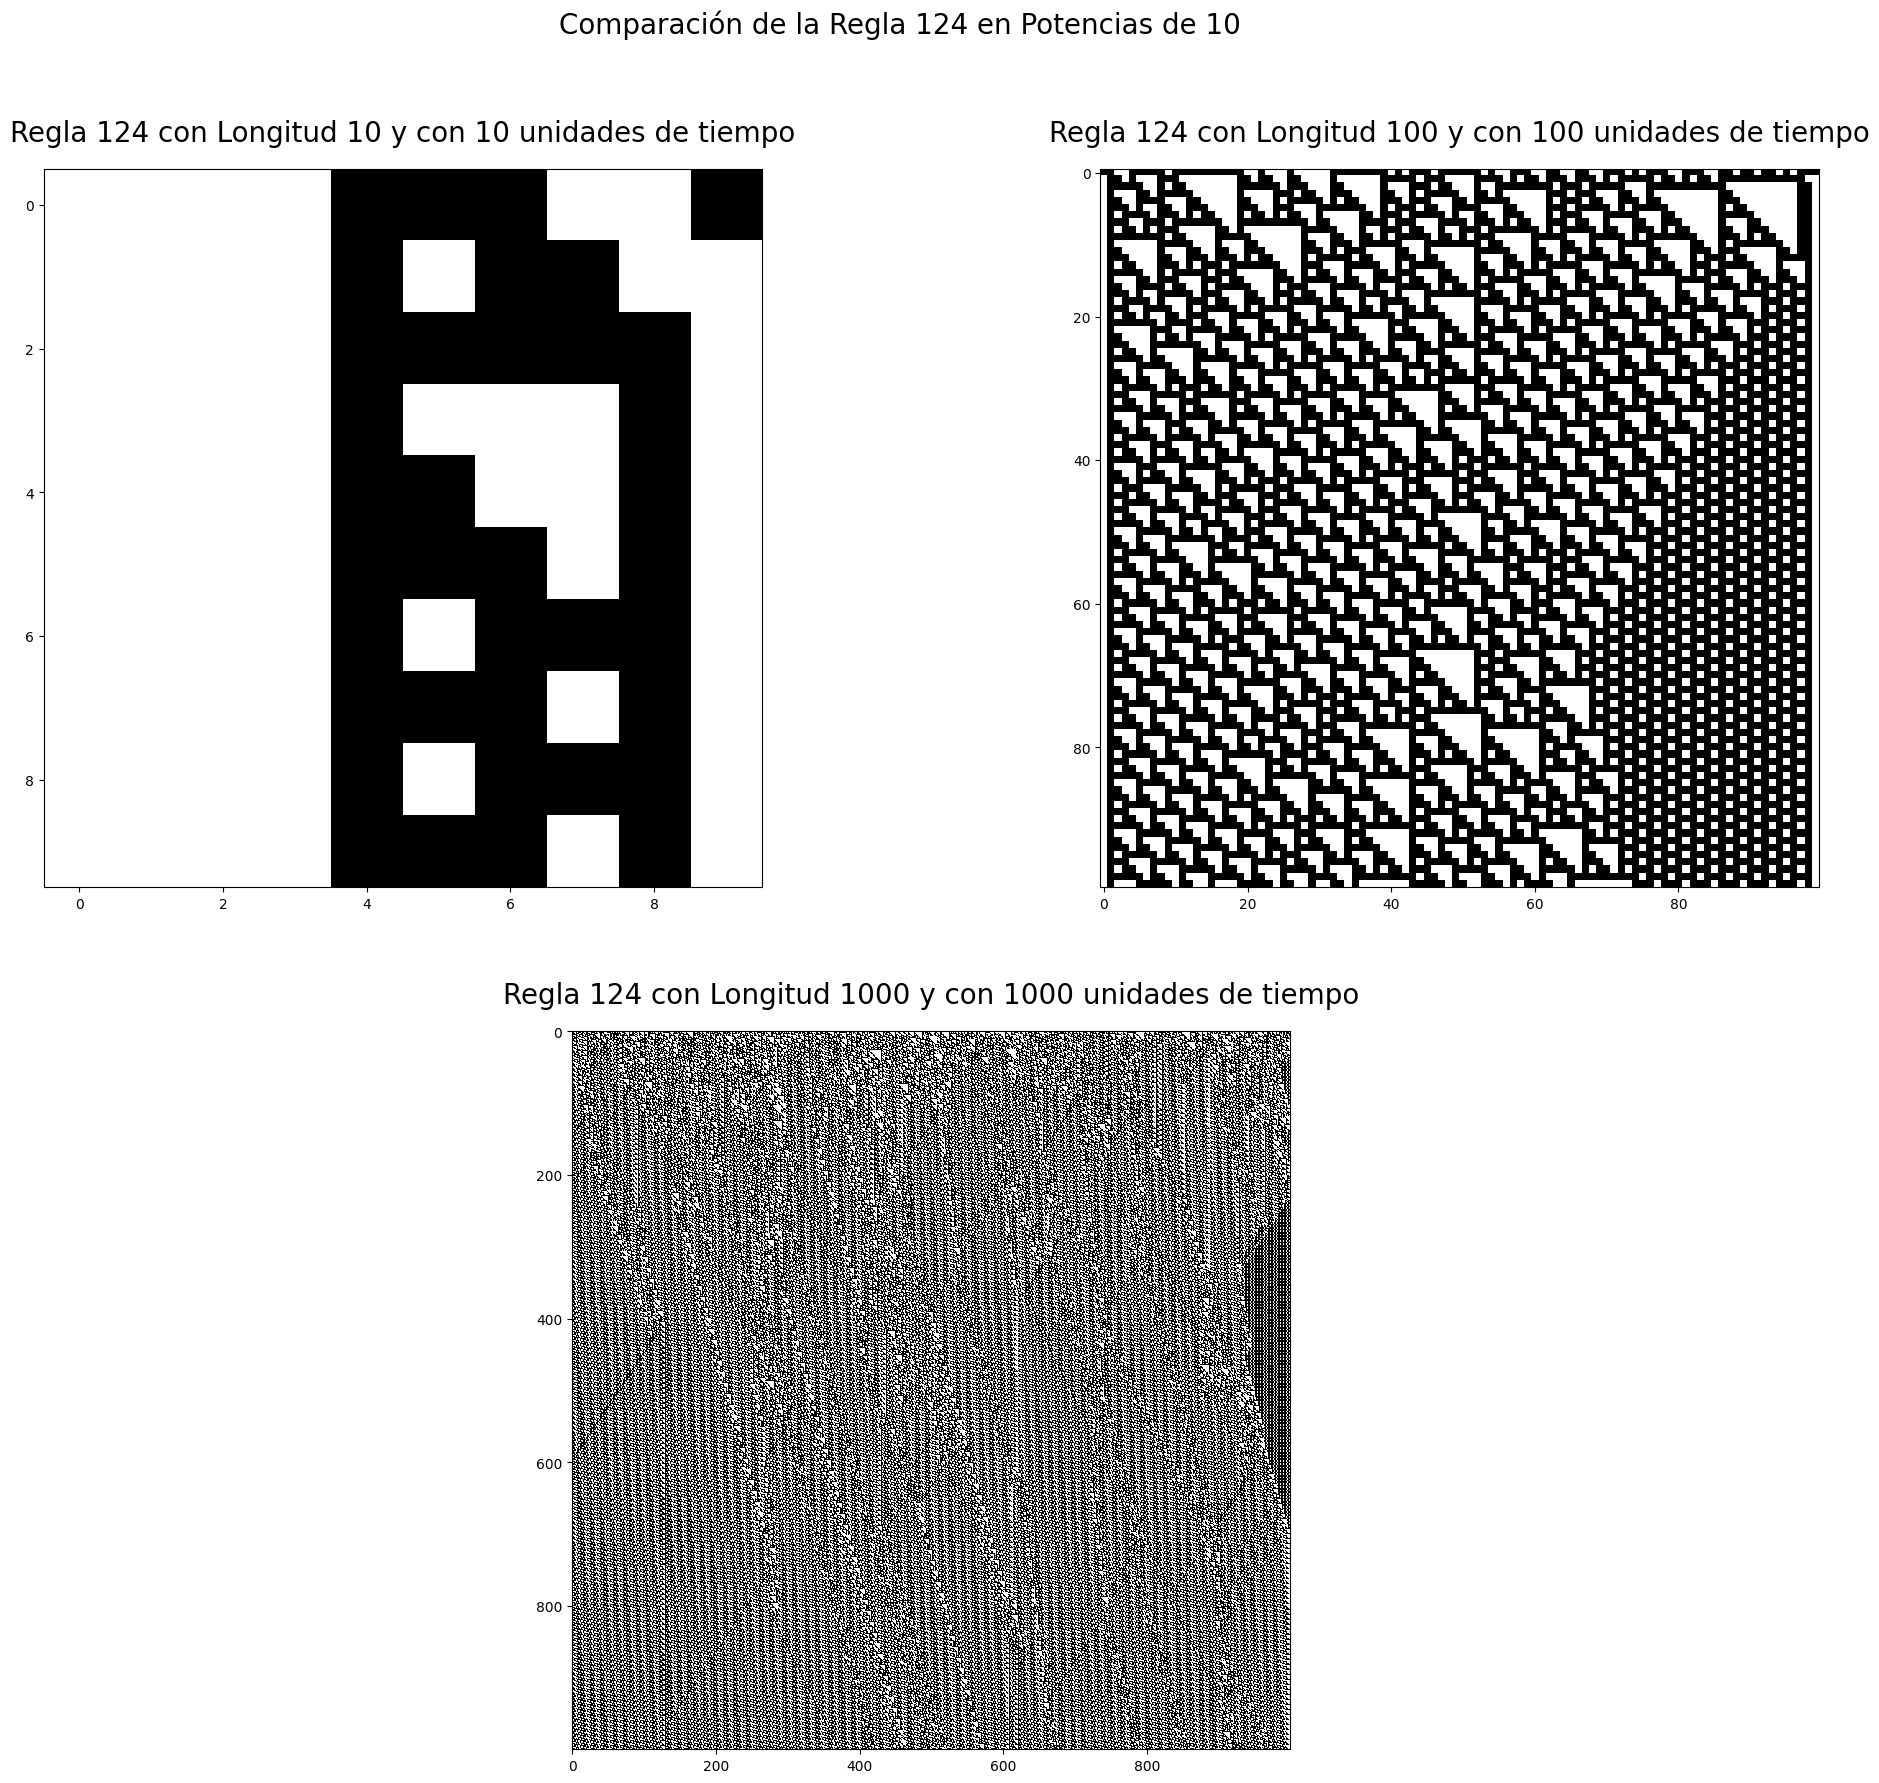

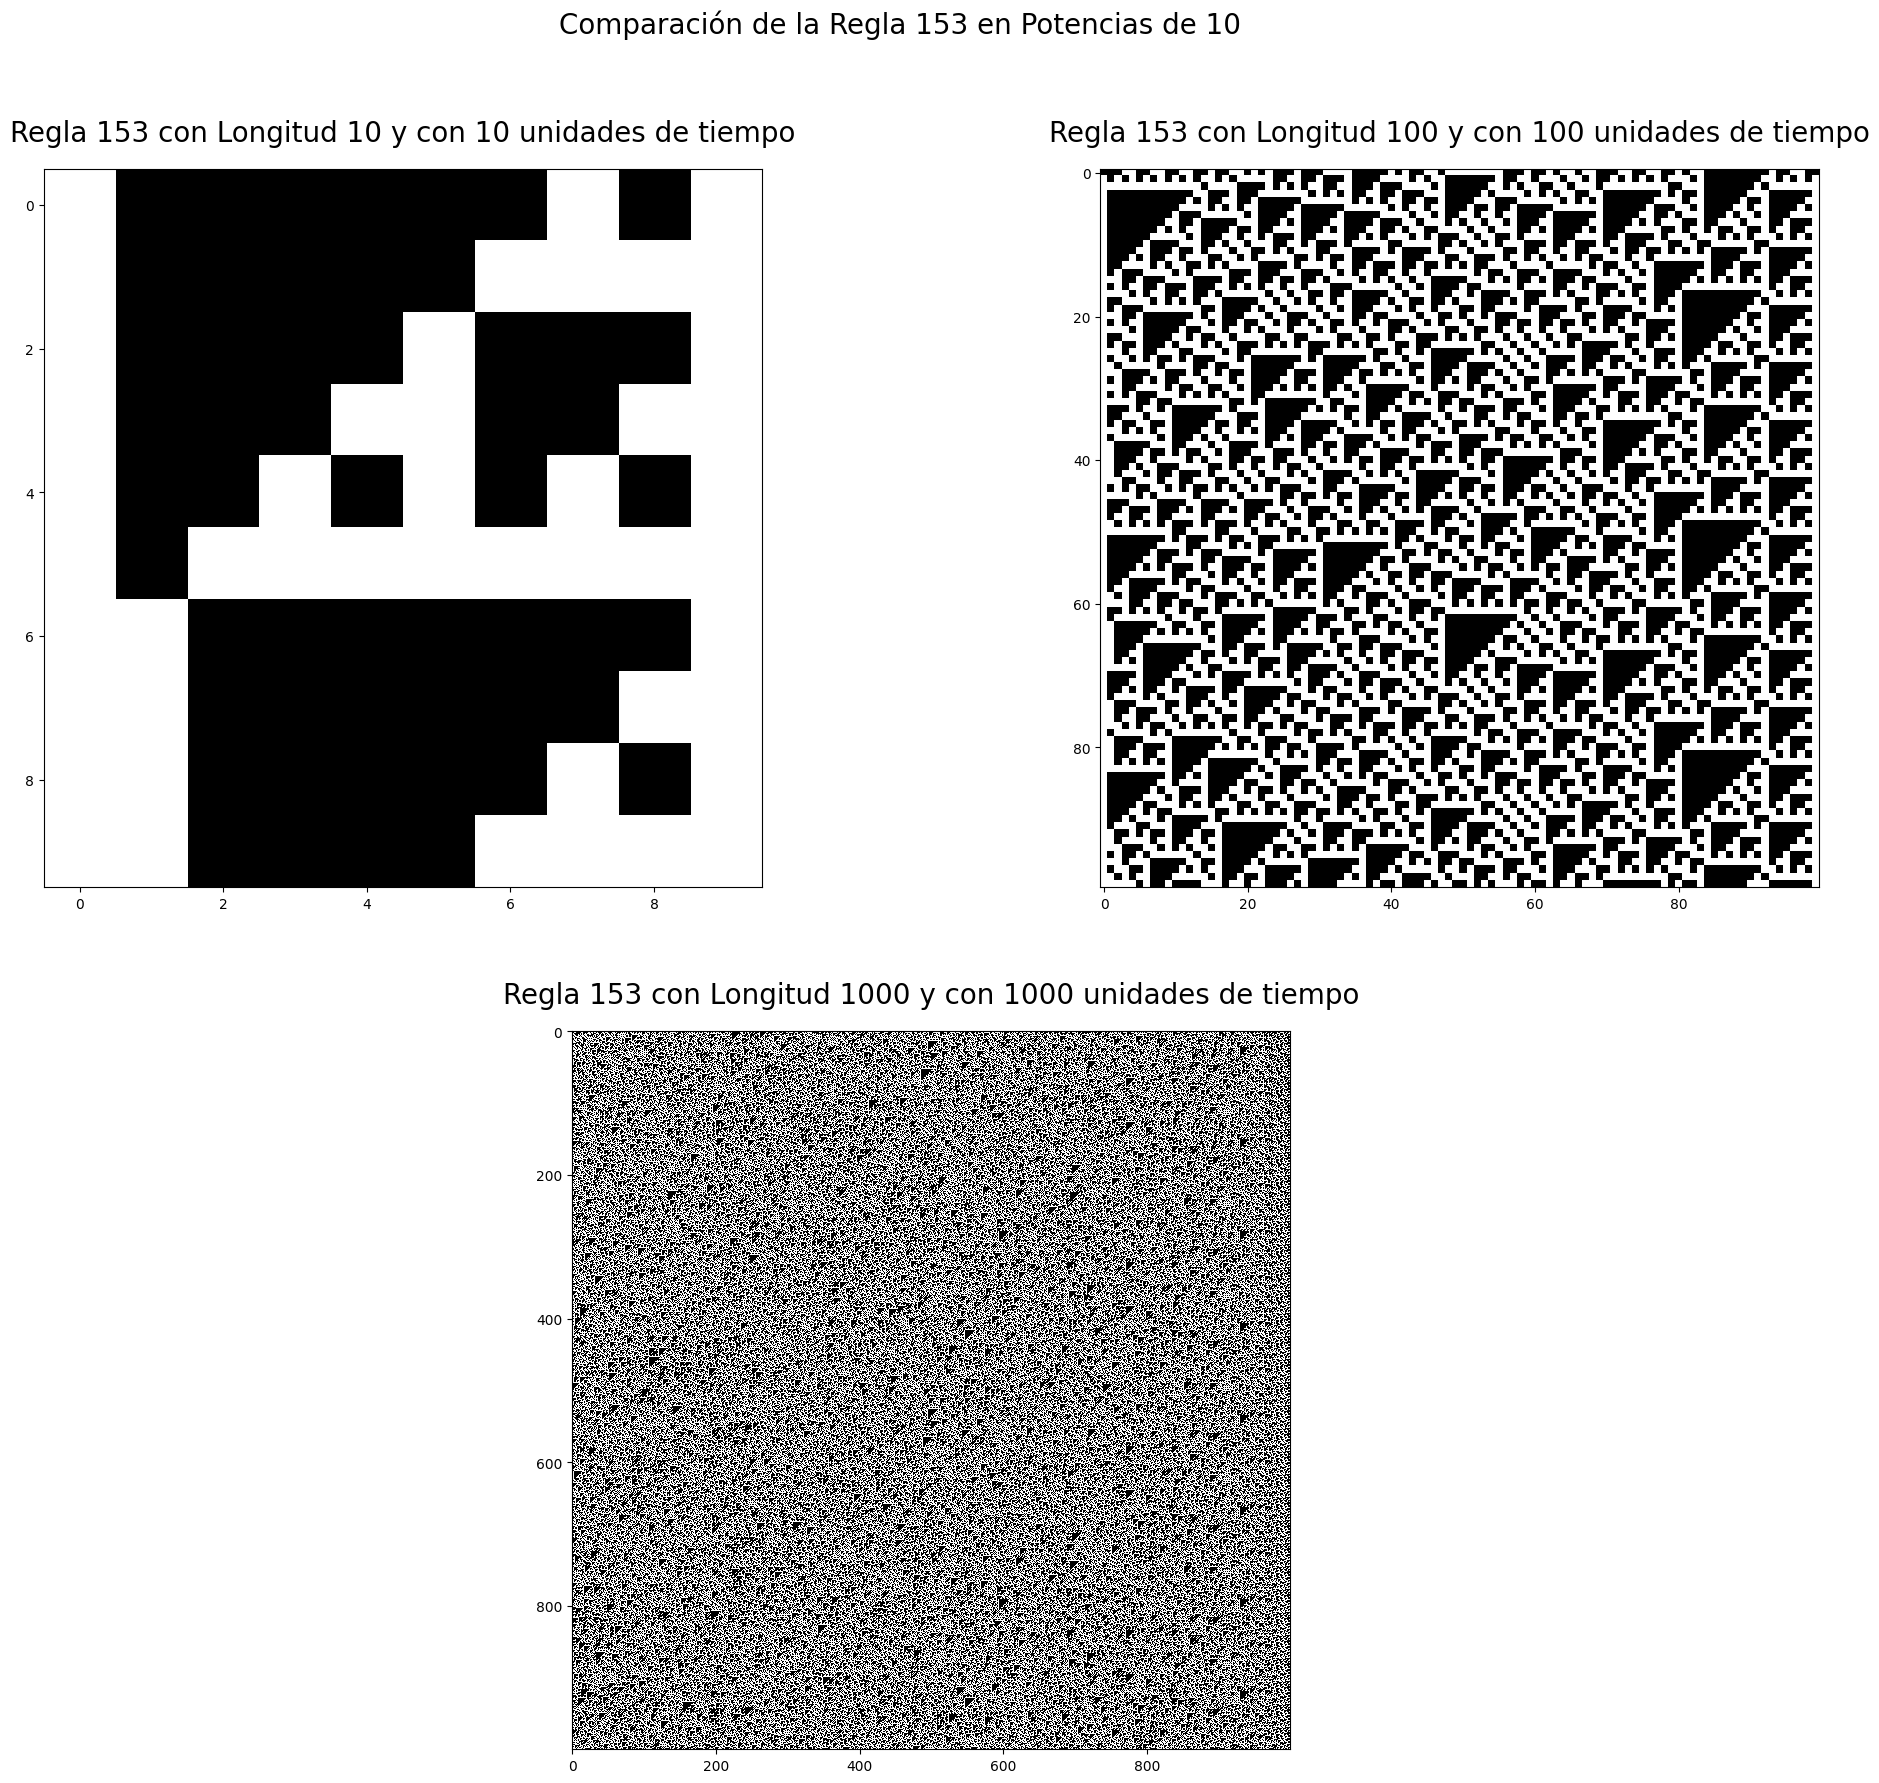

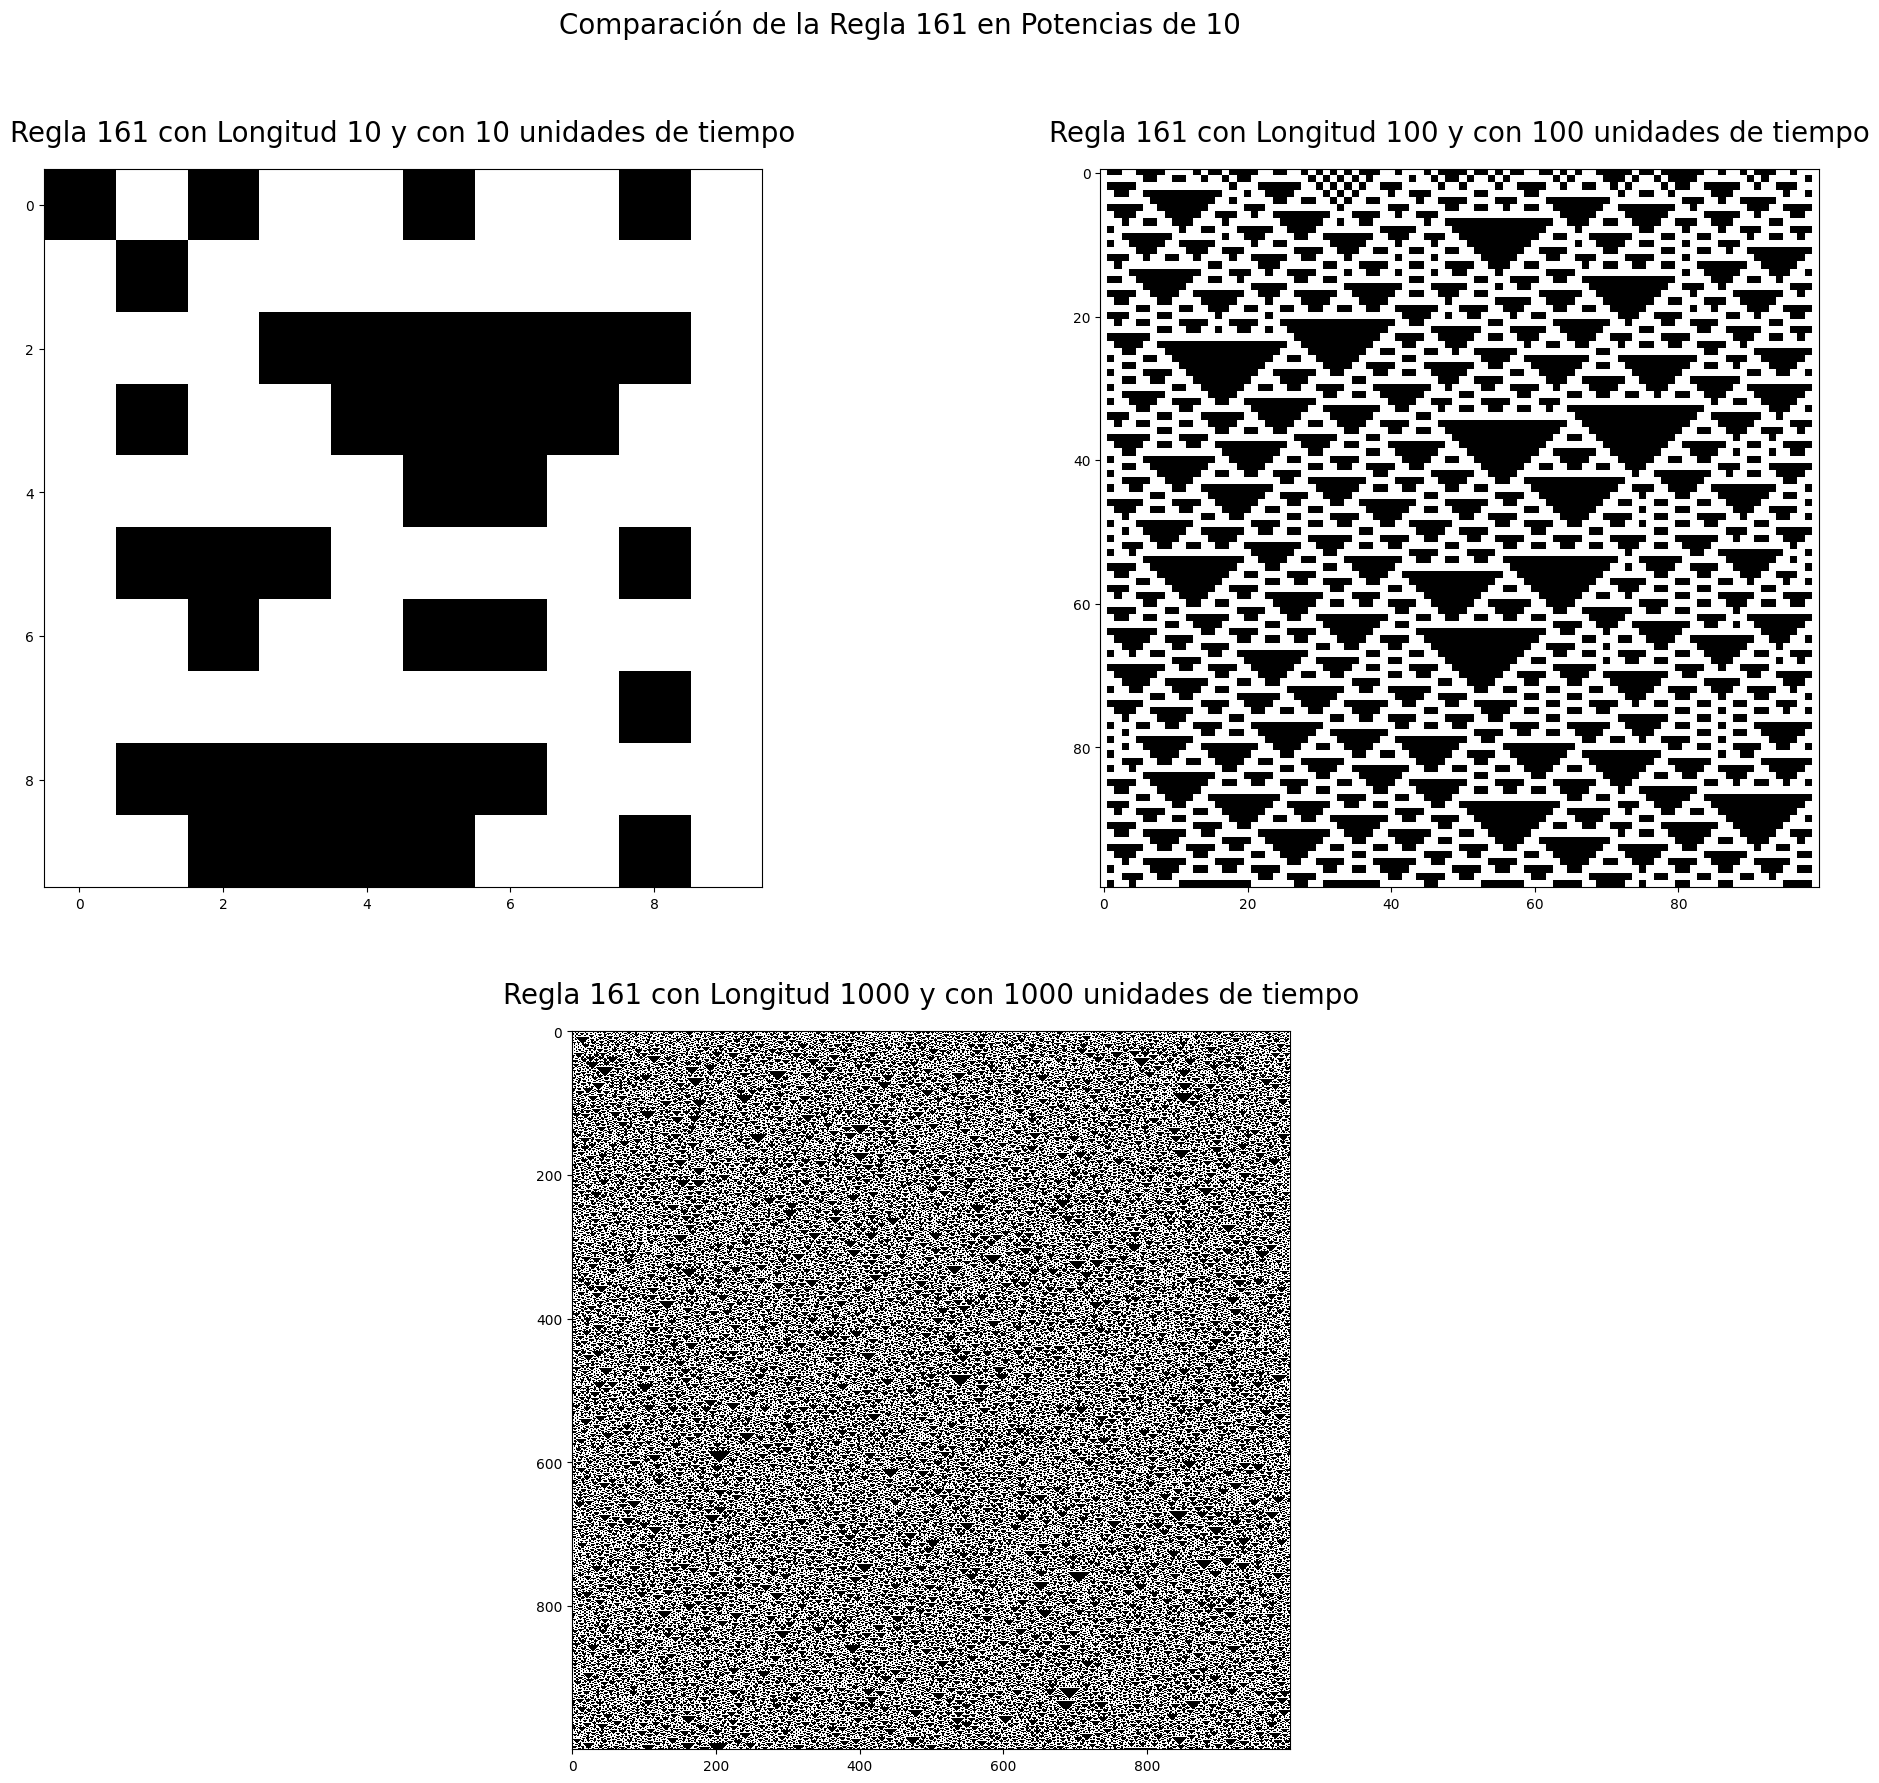

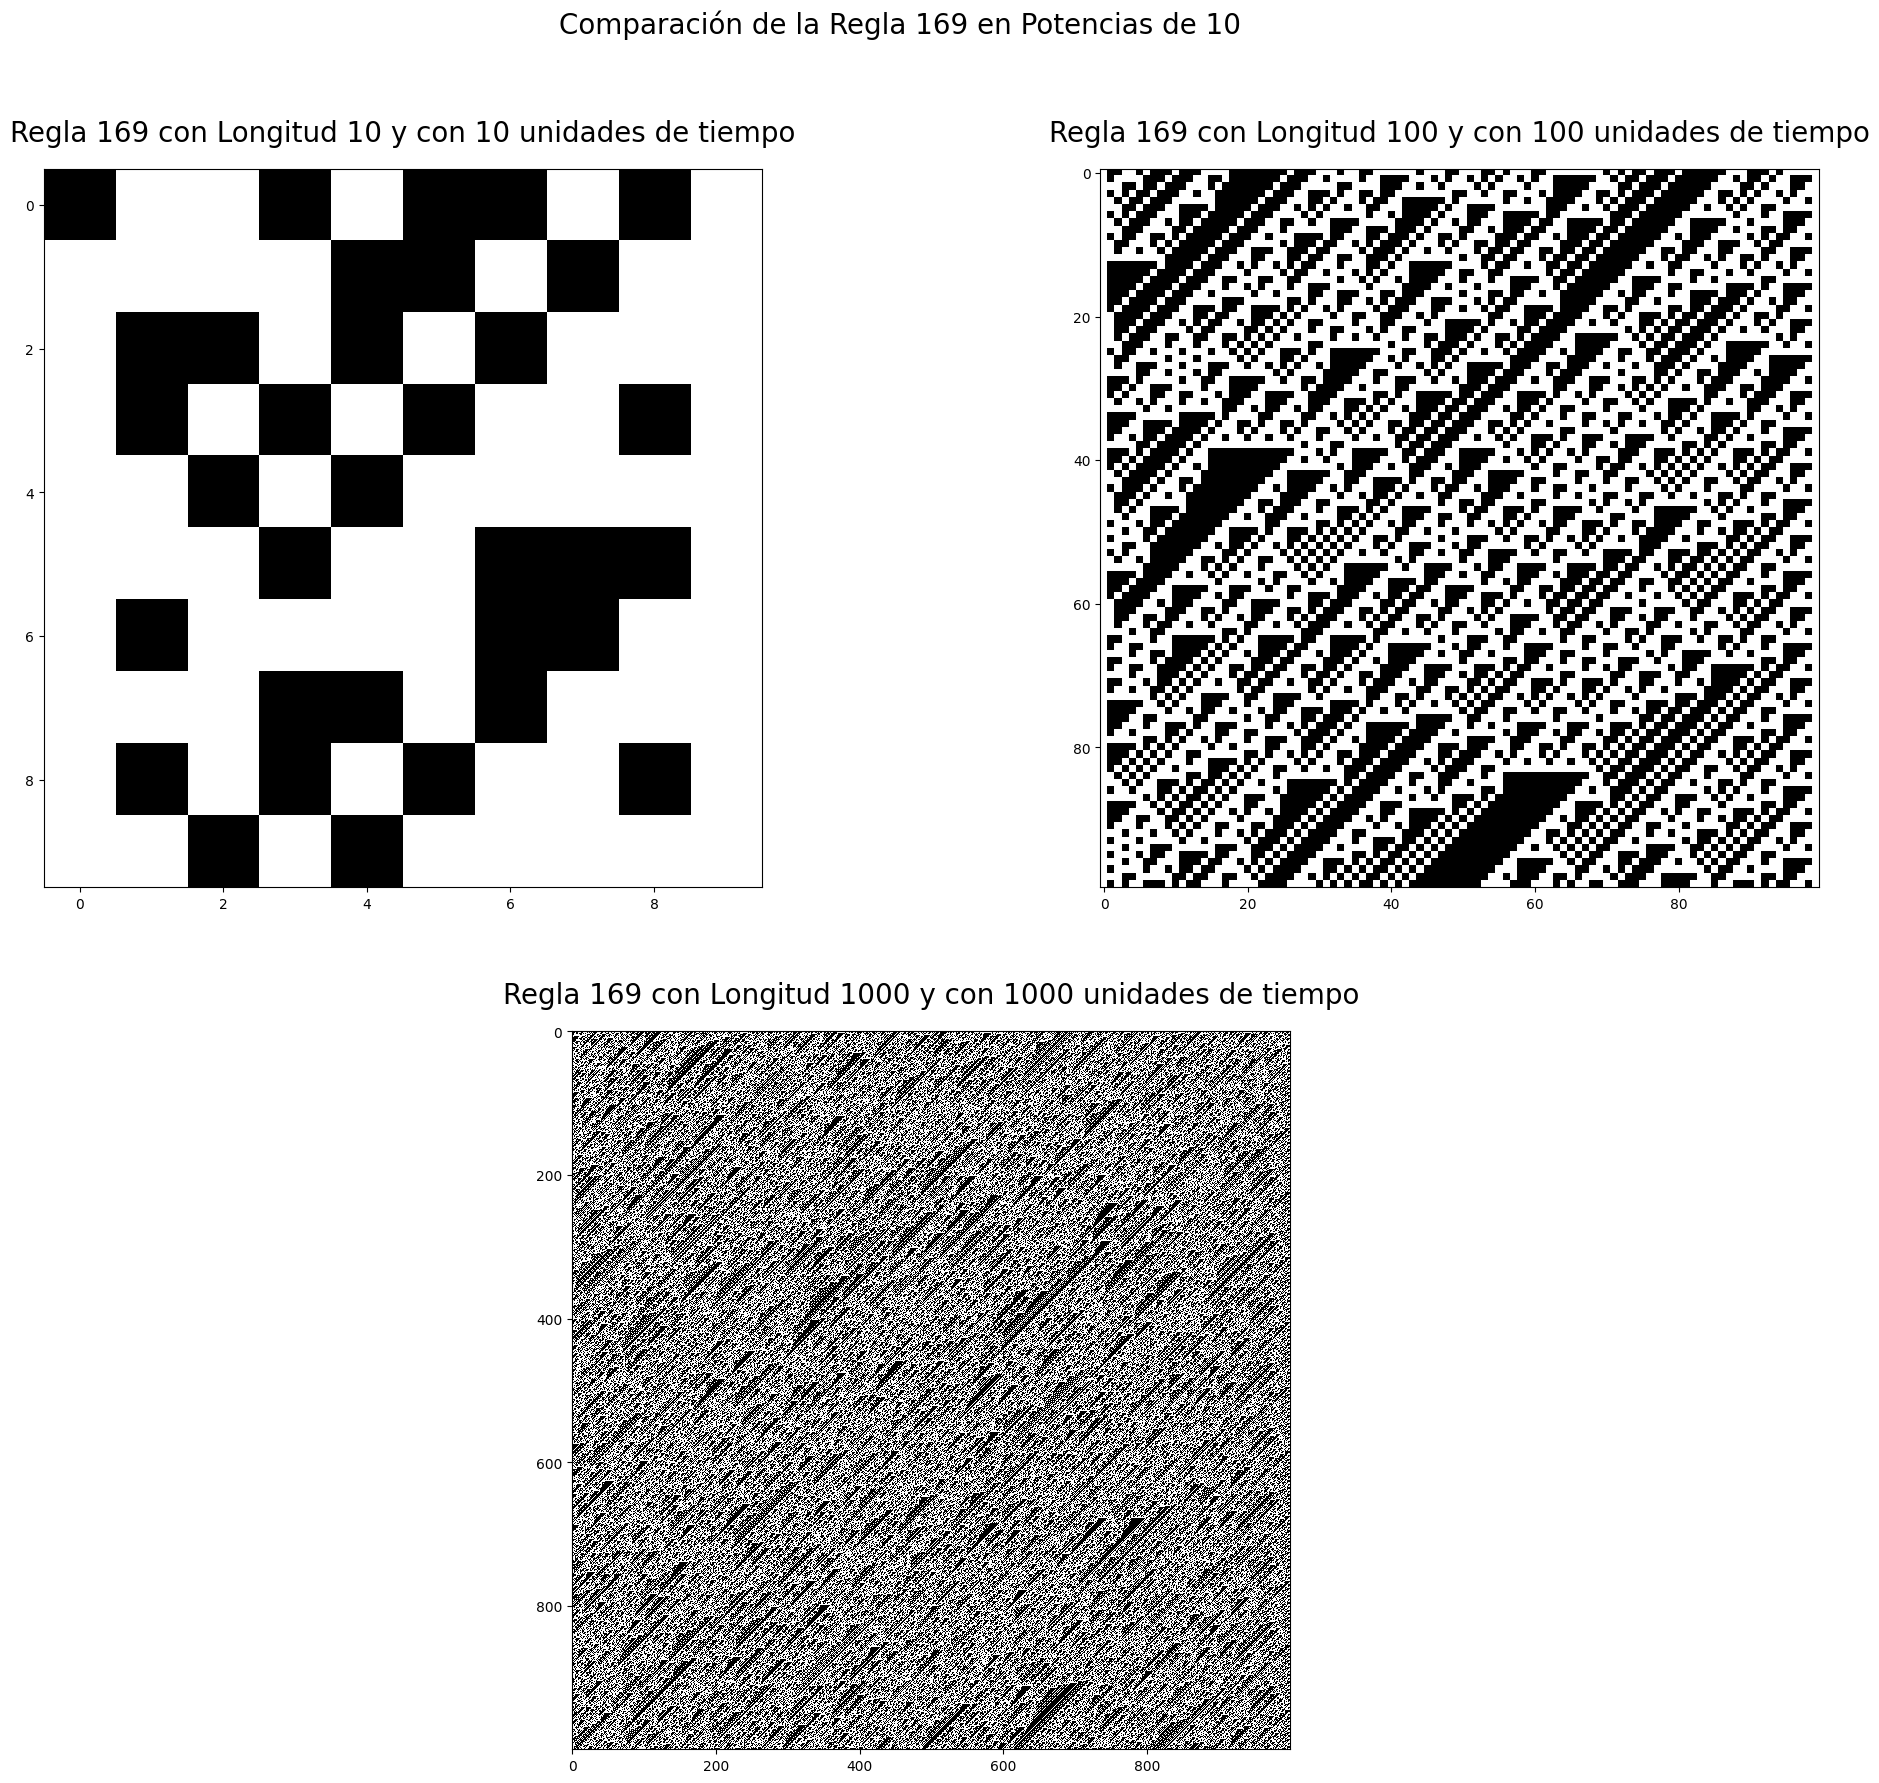

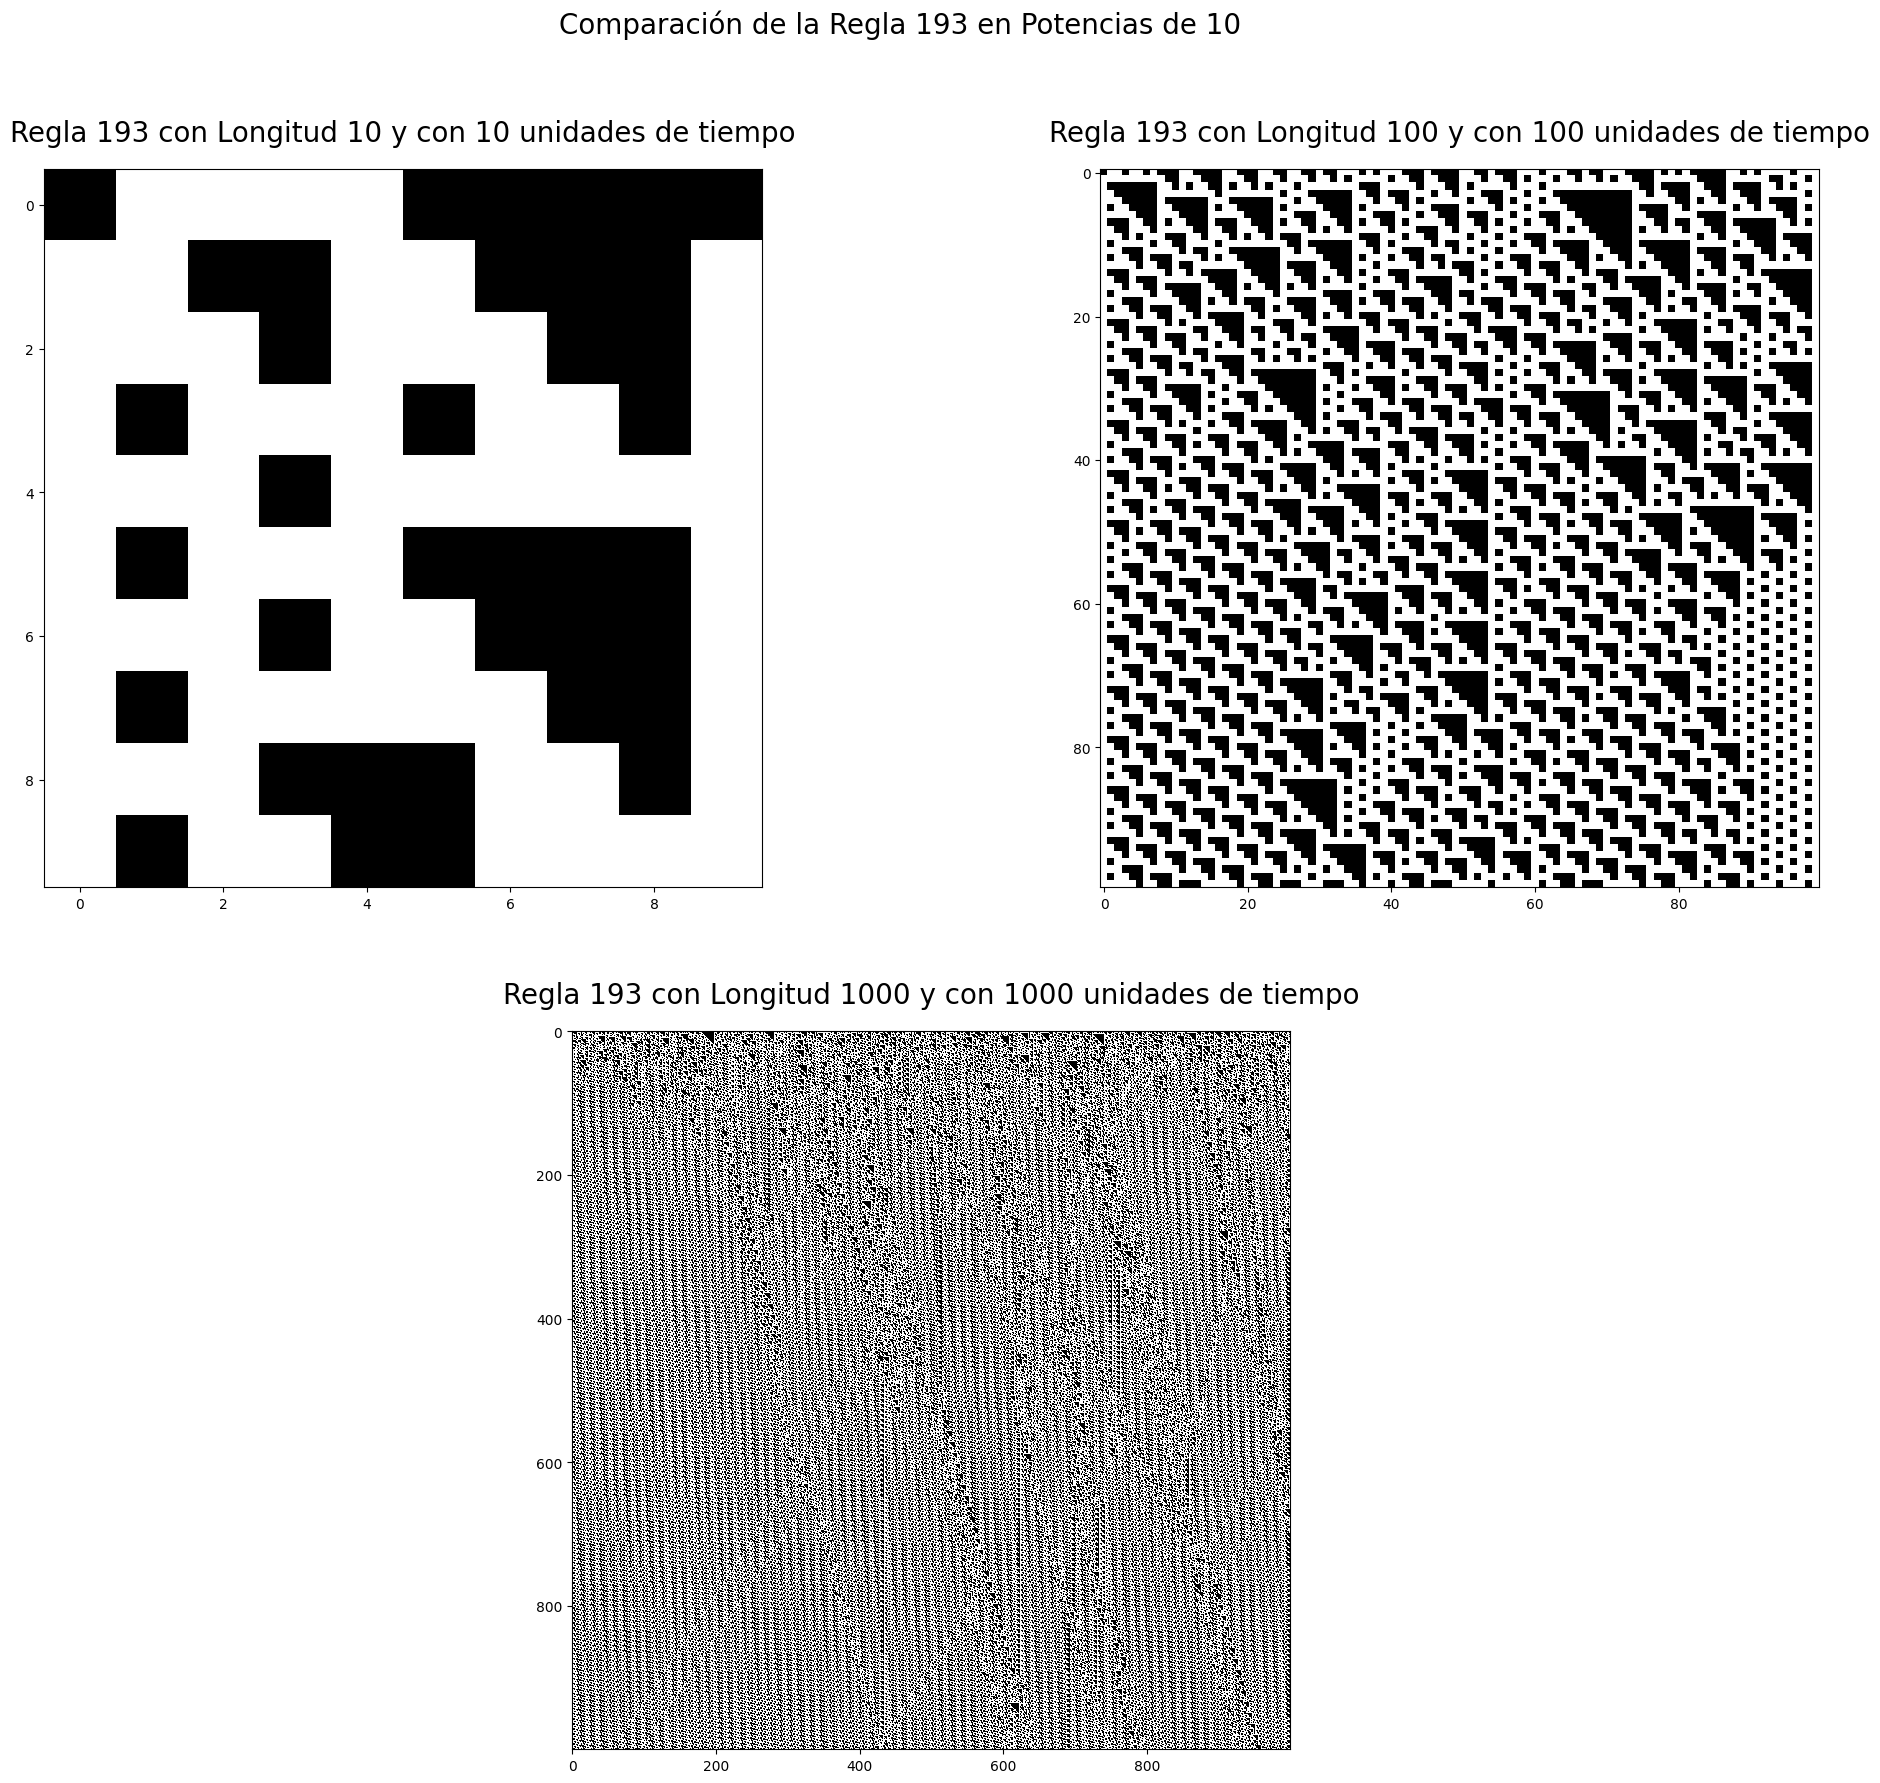

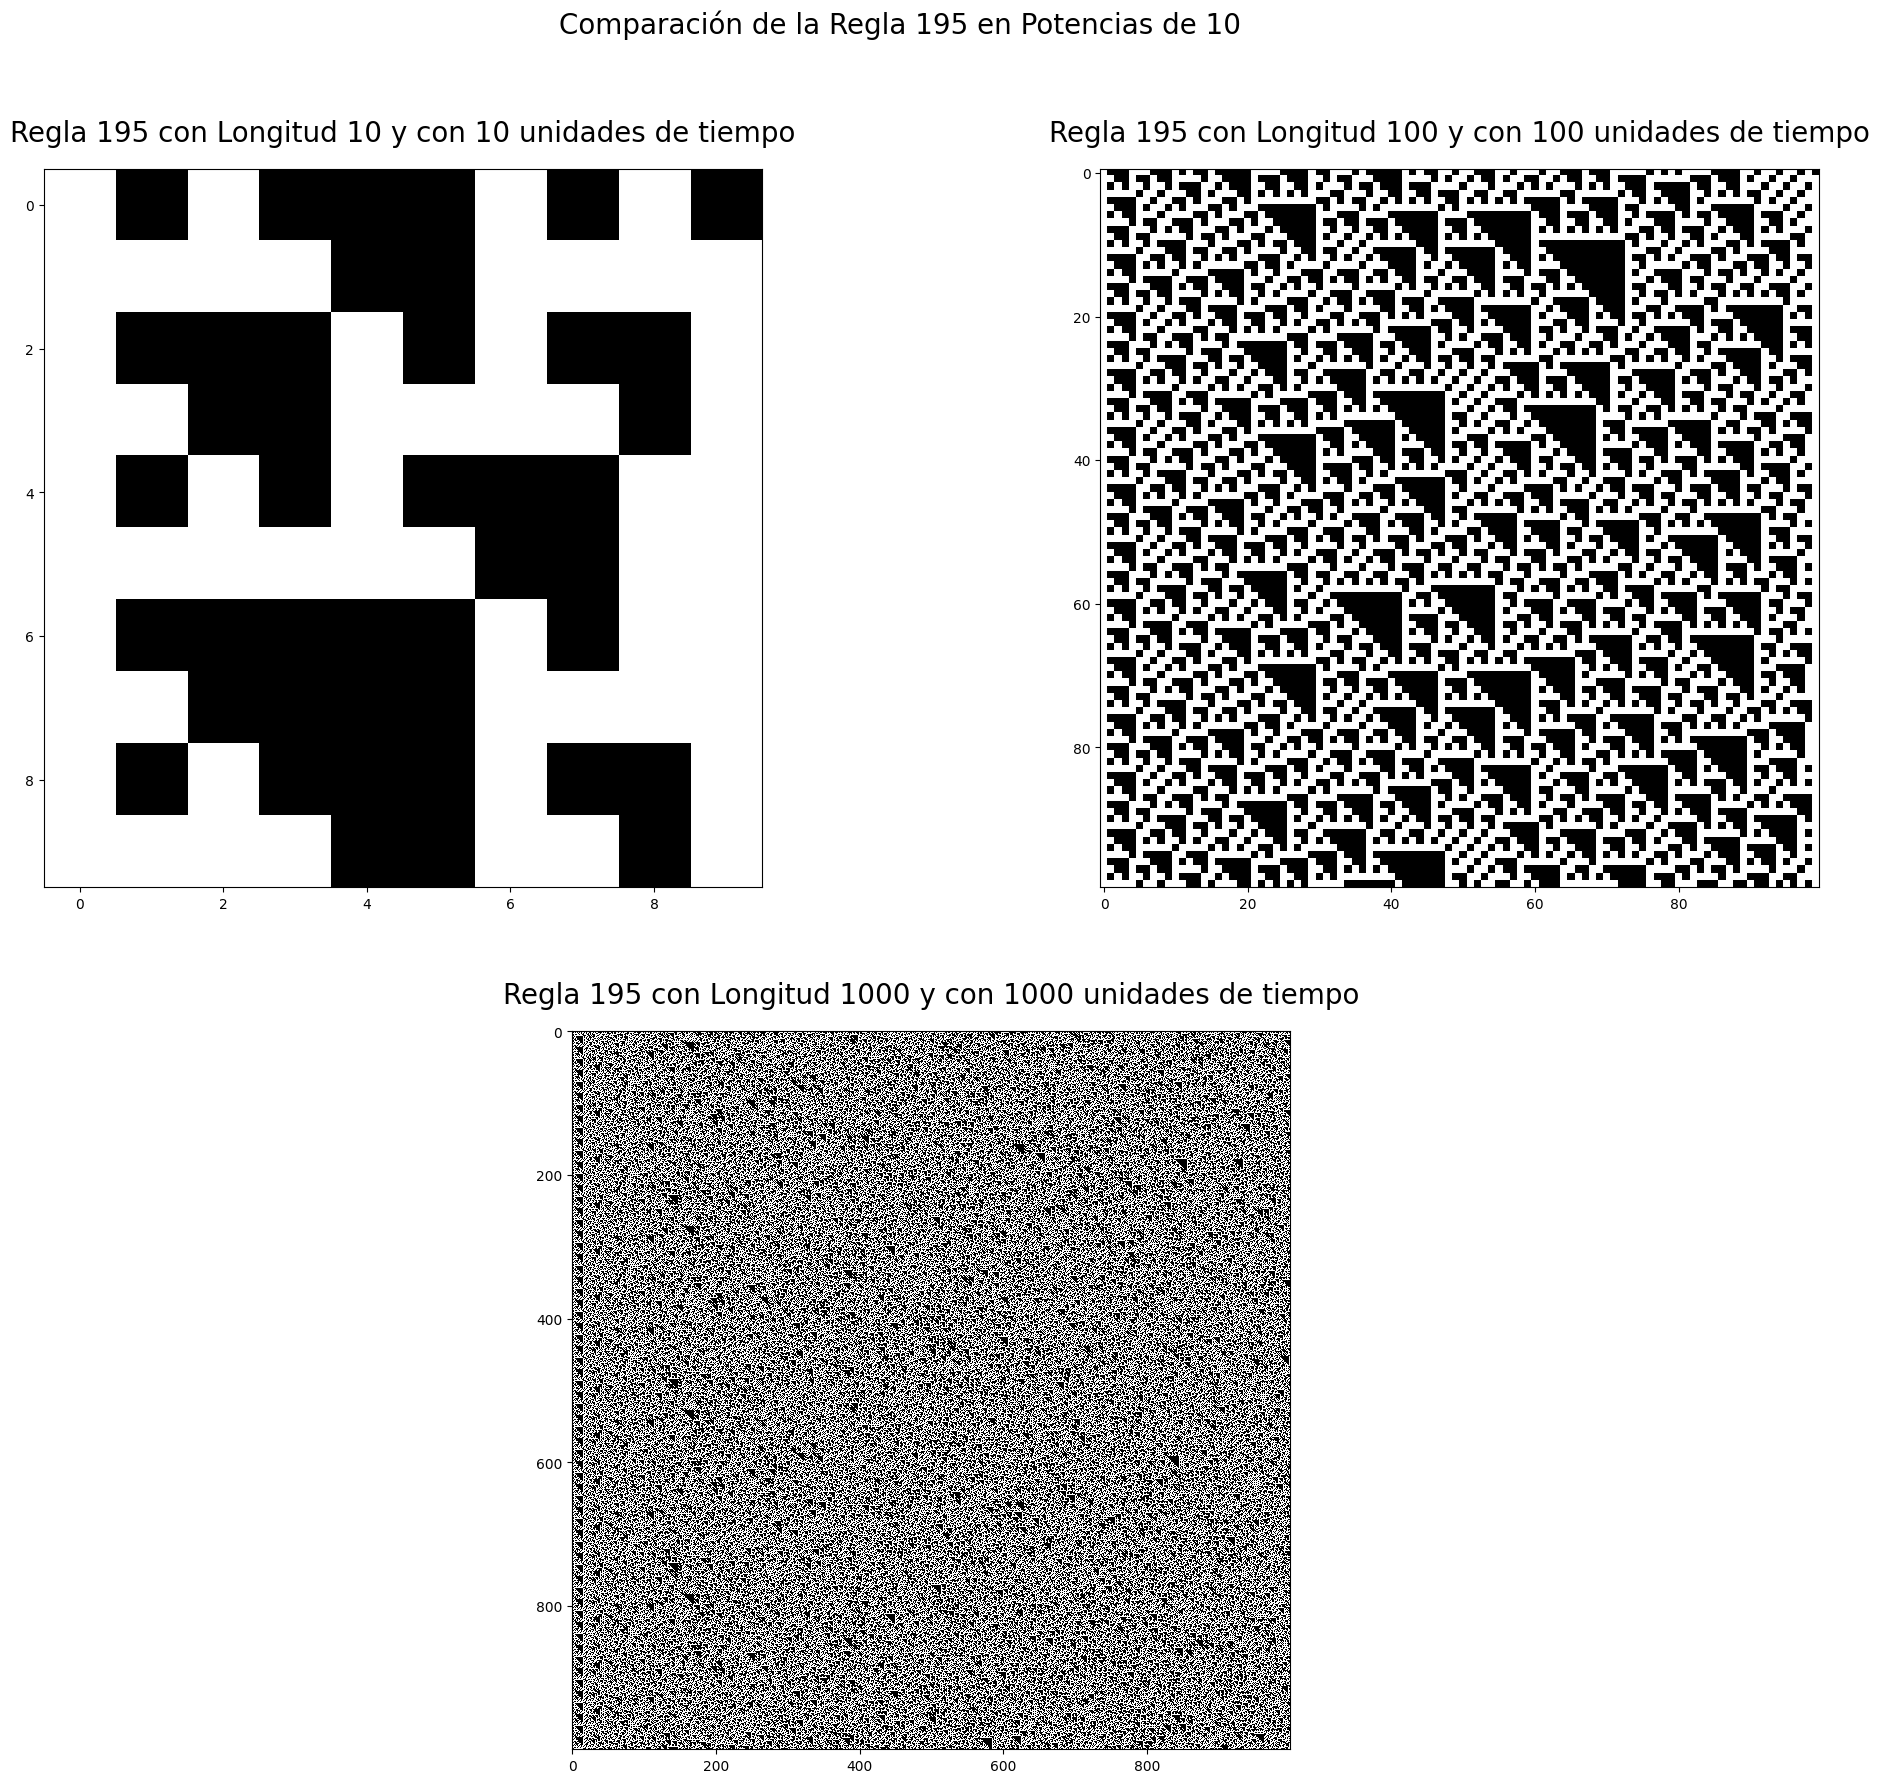

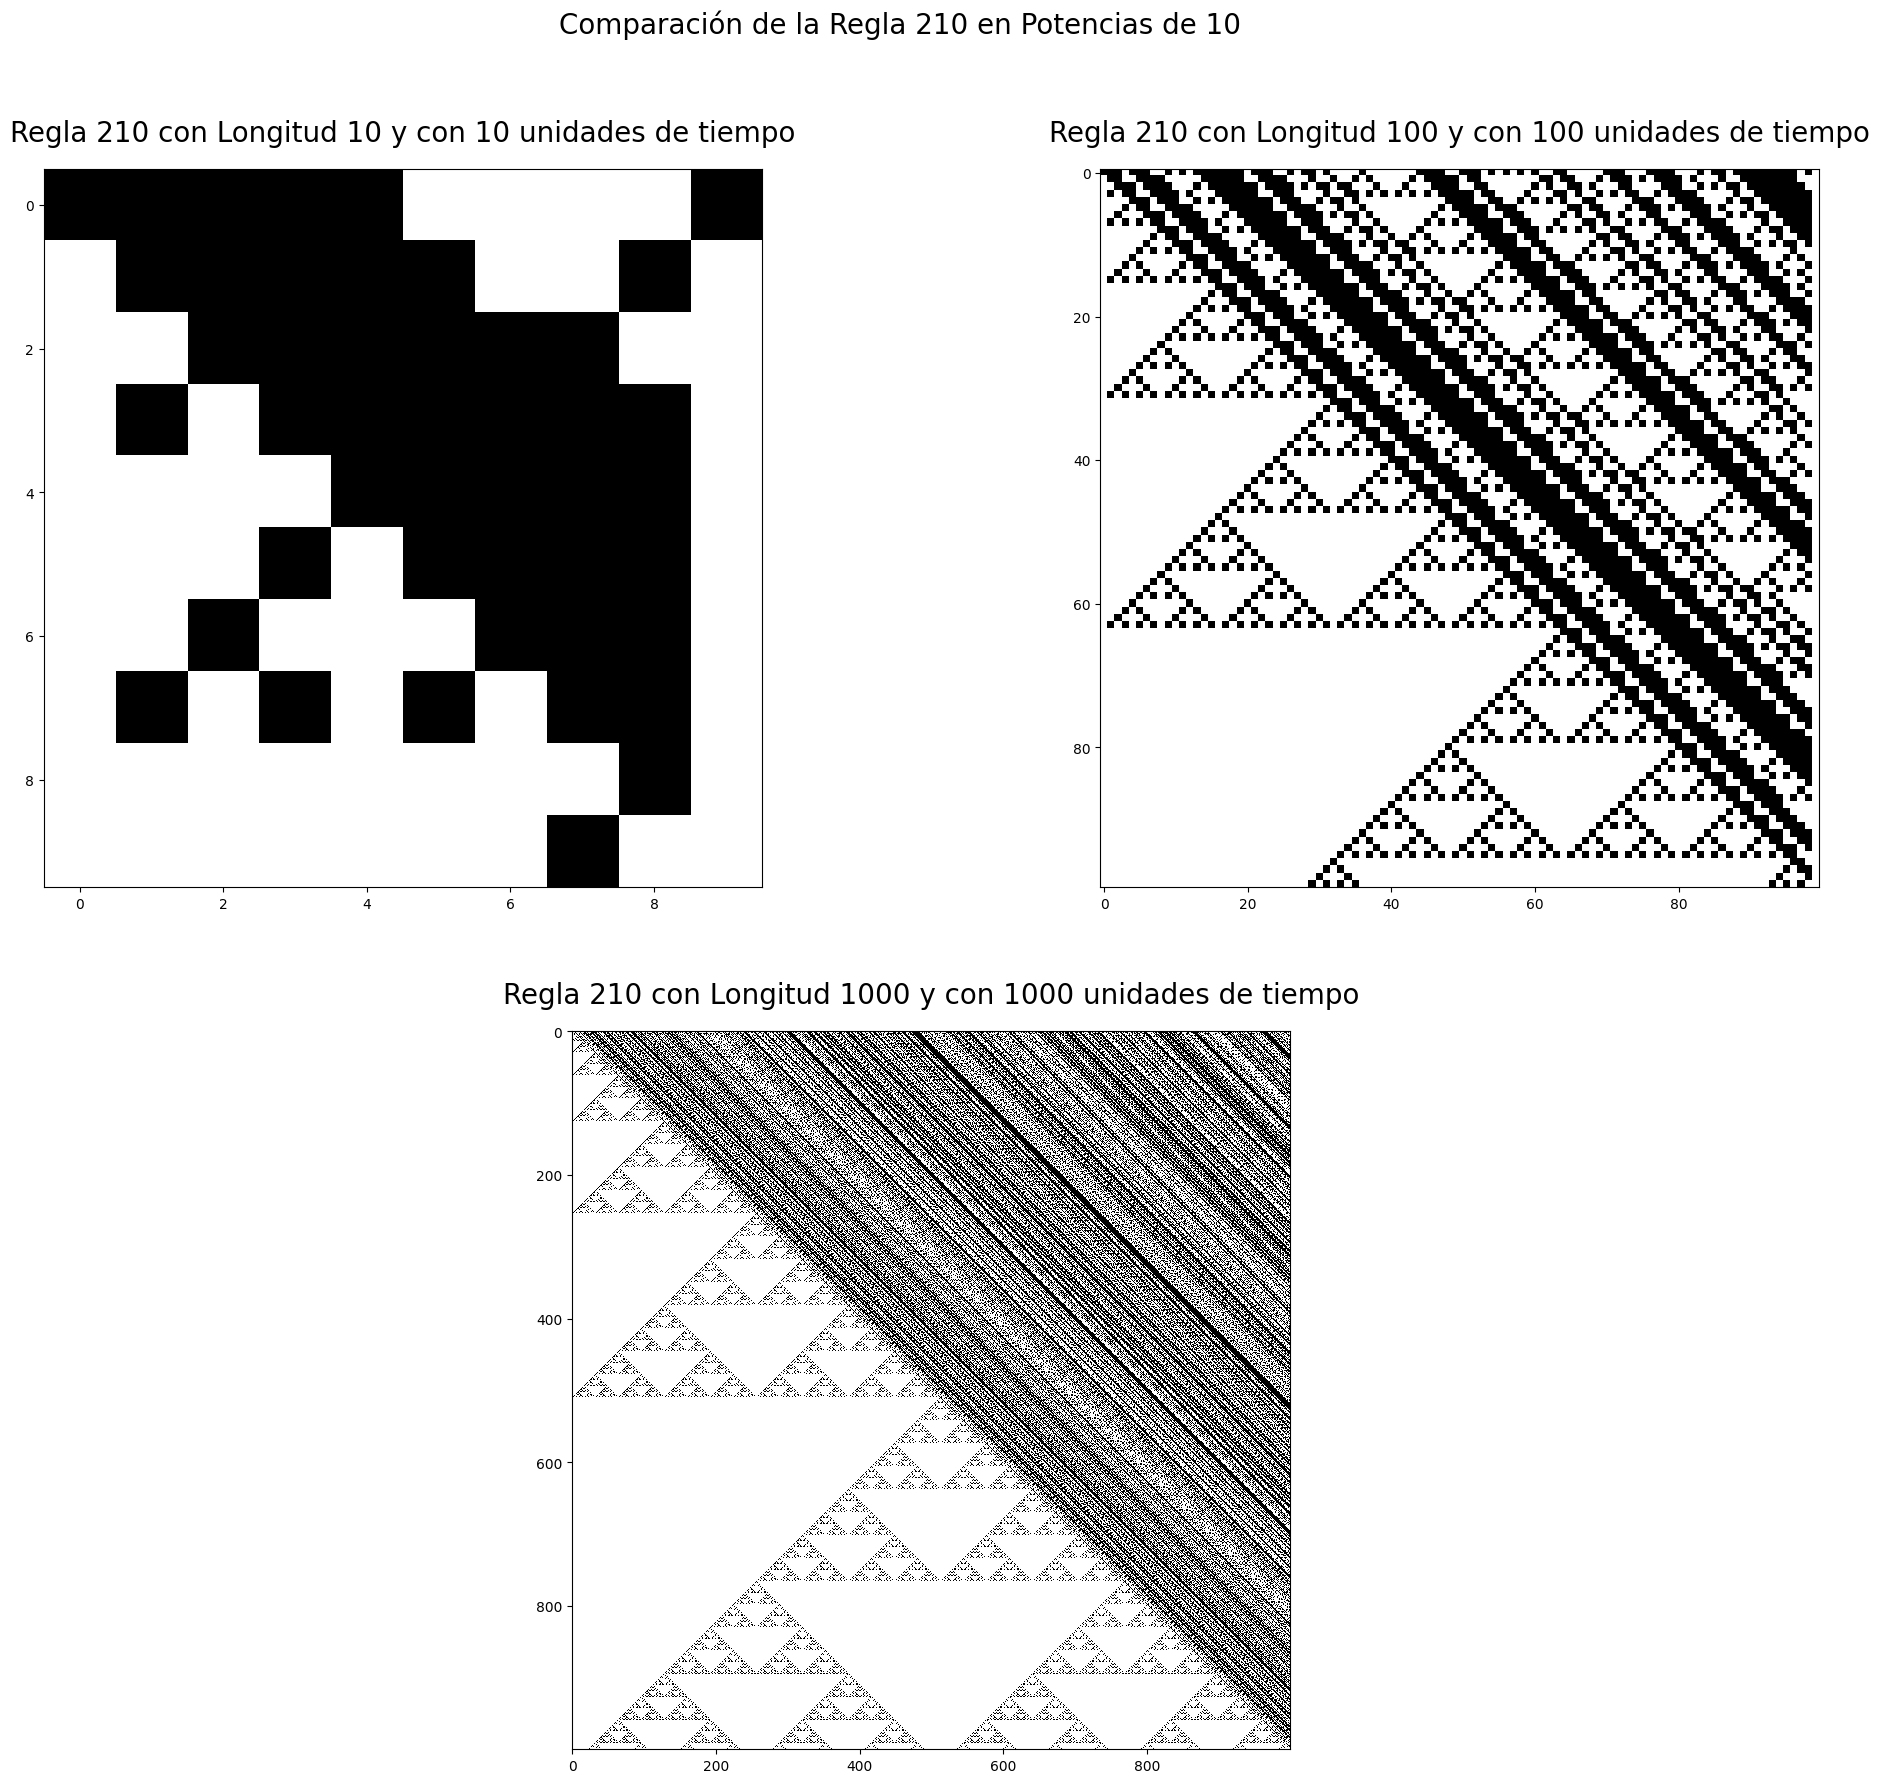

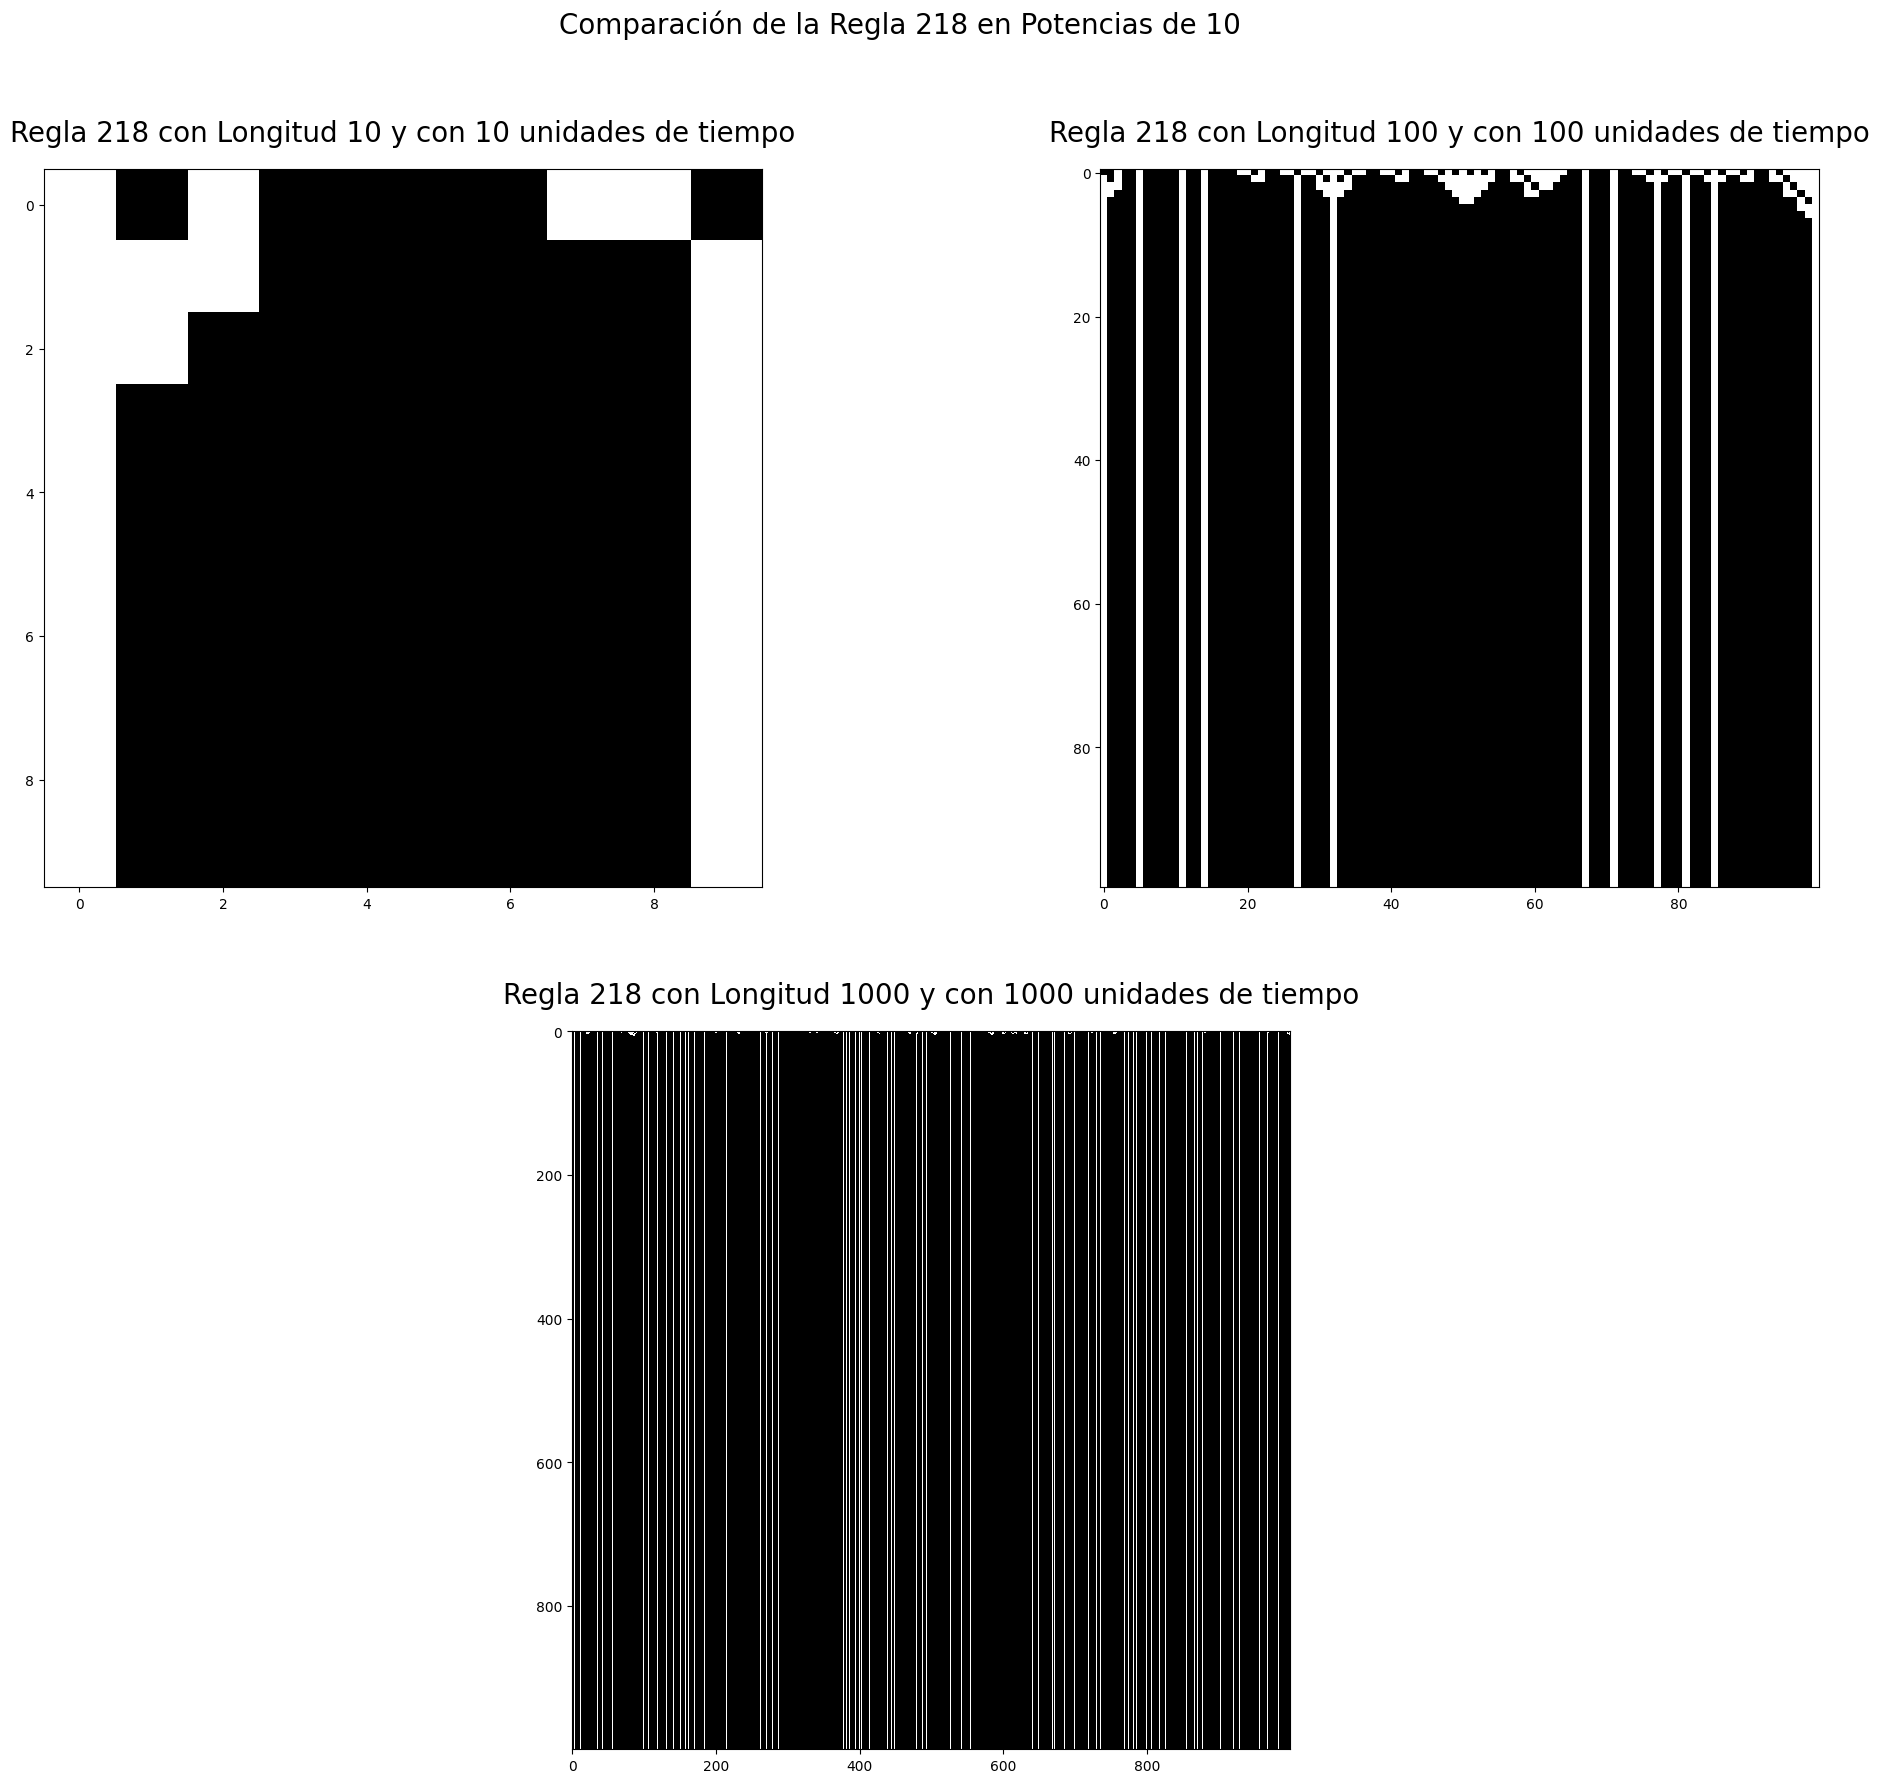

In [24]:
l=[13, 19, 124, 153, 161, 169, 193, 195, 210, 218]
for i in l:
    comparacion(i)

### 6. Evolucione el autómata para cada una de las nuevas reglas que ha propuesto. En cada paso, para cada línea de celdas de su autómata, calcule las probabilidades de encontrar los patrones de bits 000, 001, 010, 011, 100, 101, 110 y 111: 𝑝000, 𝑝001, 𝑝010, 𝑝011, 𝑝100, 𝑝101, 𝑝110 y 𝑝111. Con estas probabilidades, calcule la cantidad de información (entropía) de la configuración del autómata celular en el paso en el que se encuentra:

In [120]:

def entropia(linea):
    n=len(linea)
    patrones = {}
    for i in range(n):
        patron = (linea[(i-1)%n],linea[(i)],linea[(i+1)%n])
        if patron in patrones:
            patrones[patron] += 1
        else:
            patrones[patron] = 1

    entropia=0

    for conteo in patrones.values():
        probabilidad=conteo/n 
        entropia=entropia -probabilidad*np.log2(probabilidad)
    return entropia 

def entropiapro(matriz):
    calor=[]
    for i in range(0,np.shape(matriz)[0],1):
        a=entropia(matriz[i])
        calor.append(a)
    return calor

def tiempo(array):
    M=np.arange(1,np.size(array)+1,1)
    return M

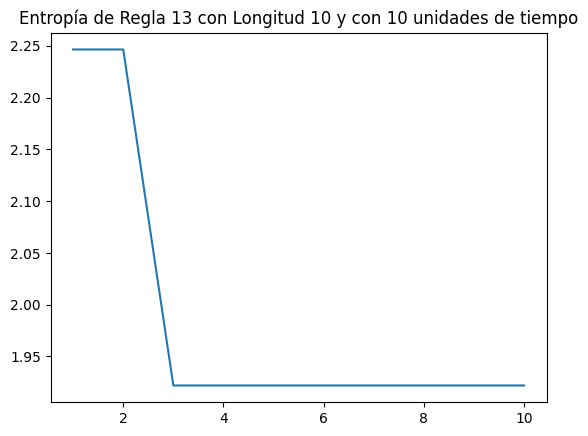

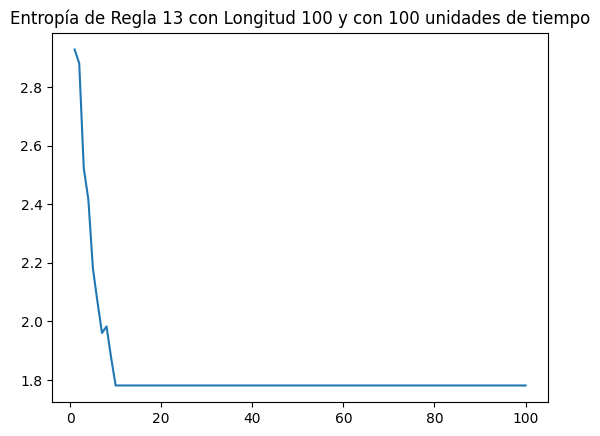

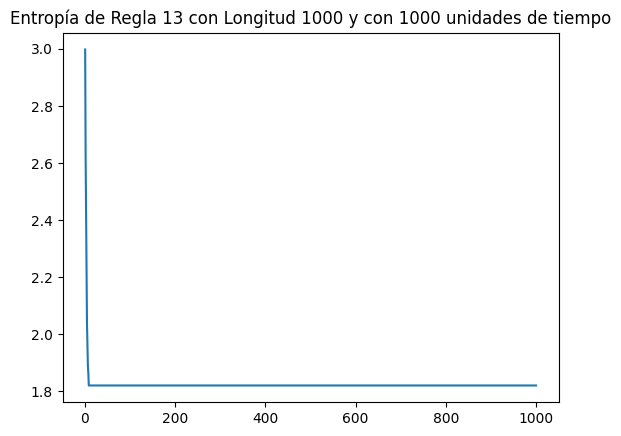

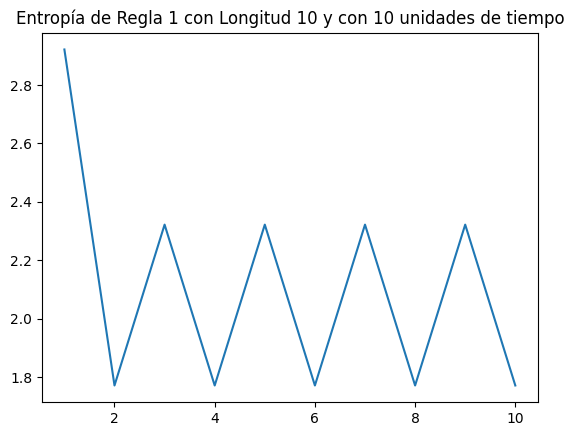

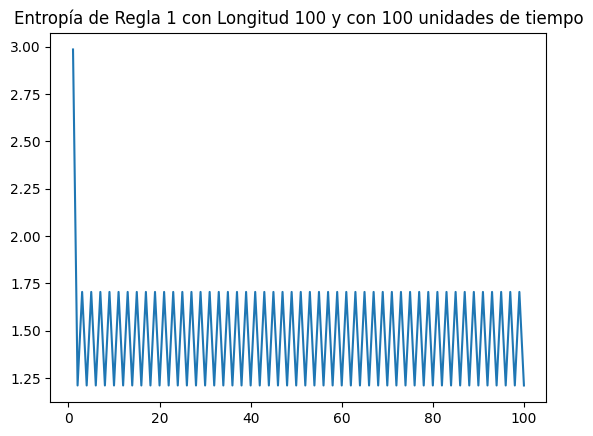

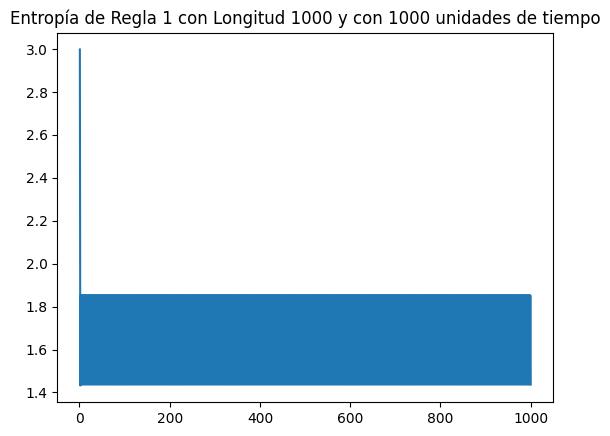

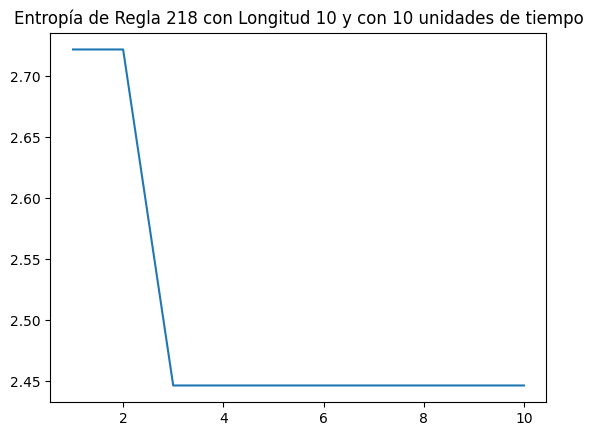

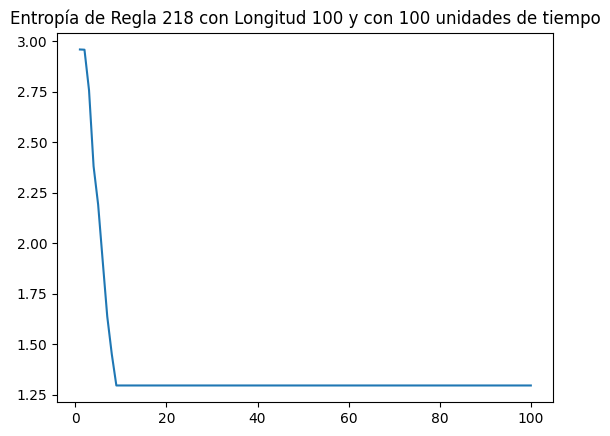

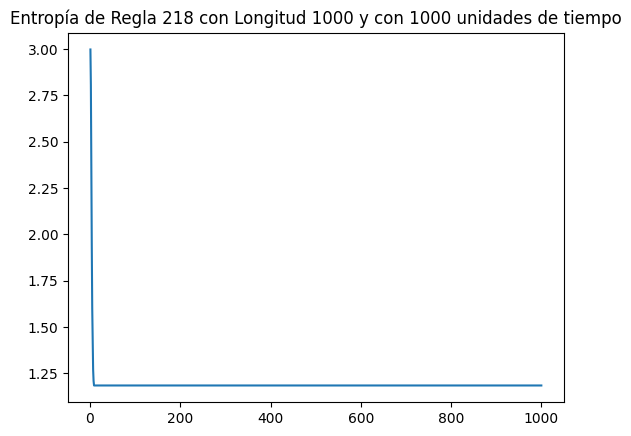

In [142]:
for j in [13, 1, 218]:
    for i in [10,100,1000]:
        M=generate_rule_110(i,i,j)
        N=entropiapro(M)
        t=tiempo(N)
        plt.plot(t,N)
        plt.title(f"Entropía de Regla {j} con Longitud {i} y con {i} unidades de tiempo")
        plt.show()
